In [1]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import os
import geopandas as gpd
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
import seaborn as sns
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 22})

In [10]:
import numpy as np
## Figures
folder = 'results/octov2_mn05_1/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)
slps = np.load('{}/slps2.npy'.format(folder),allow_pickle=True)

In [11]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octopus_v2')
oldid = a.index


#a.index = range(len(a))

#a['log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)])

#a['ebe_mmkyr'][np.abs(a['log(residual (m/Myr))'].to_numpy()) > 2] = np.nan  #Maybe we want to remove the big outliers (pedro?)



## Begin duplicate analysis

In [12]:
c = a.centroid
cb = a.centroid.buffer(.01)
ca = a.area
is2 = [np.where(cb.contains(c.iloc[i])) for i in range(len(a))]
is1 = []
j2=0
for j in a.index:
    
    is1.append([])
    for i in range(len(is2[j2])):
        #print((np.abs(ca[j] - ca[is2[j][i]]) / ca[is2[j][i]] < .05))
        if (np.abs(ca[j] - ca[is2[j][i]]) / ca[is2[j][i]] < .05).to_numpy()[ 0 ]: # Less than 5 % change
            print(np.abs(ca[j] - ca[is2[j][i]]) / ca[is2[j][i]])
            is1[ j2 ].append(is2[ j ][ i ])
    j2+=1
    #is1.append()
    a.index


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_49689/4186649628.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  c = a.centroid
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_49689/4186649628.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cb = a.centroid.buffer(.01)
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_49689/4186649628.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cb = a.centroid.buffer(.01)
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_49689/4186649628.py:3: UserWarning: Geometry is in a geographic C

0    0.0
1    0.0
2    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
dtype: float64
3    0.0
dtype: float64
4    0.0
dtype: float64
5    0.0
dtype: float64
6    0.0
dtype: float64
7    0.0
dtype: float64
8    0.0
dtype: float64
9    0.0
dtype: float64
10    0.0
11    0.0
dtype: float64
10    0.0
11    0.0
dtype: float64
12    0.0
dtype: float64
13      0.000000
4516    0.000817
dtype: float64
14    0.0
dtype: float64
15    0.0
dtype: float64
16    0.0
dtype: float64
17    0.0
dtype: float64
18    0.0
19    0.0
dtype: float64
18    0.0
19    0.0
dtype: float64
20    0.0
dtype: float64
21    0.0
22    0.0
23    0.0
dtype: float64
21    0.0
22    0.0
23    0.0
dtype: float64
21    0.0
22    0.0
23    0.0
dtype: float64
24    0.0
dtype: float64
25    0.0
dtype: float64
26    0.0
dtype: float64
27    0.0
dtype: float64
28    0.0
dtype: float64
29    0.0
dtype: float64
30    0.0
dtype: float64
31    0.0
dtype: float64
32    0.0
dtype: float64
33    0

In [13]:
c=0
llist = []
tlist = []
llistc = []
dellist = []
for i in is1:
    llistc = [] 
    if len(i) > 0 and len(i[0]) > 1:
        for n in i[0]:
            if n not in llist and n != c:
                llist.append(n)
                llistc.append(n)
                dellist.append(n)
    c+=1
    tlist.append(llistc)
    #print(i)
    #print(i)

## commented out is analysis for john

In [15]:
a2 = a.copy()
a2.index = range(len(a2))
eb=[]
mns = []
maxmn = []
tdiff=[]
errs=[]
mnloc = []
diff2 = []
for n in range(len(a2)):
    ebe = []
    t=[]
    err=[]
    if len(tlist[n]) > 0:
        e1 = a2['ebe_mmkyr'.upper()][n]
        ebe.append(e1)
        t.append(a2['pubyear'.upper()][n])
        err.append(a2['ebe_err'.upper()][n])
        for m in tlist[n]:
            ebe.append(a2['ebe_mmkyr'.upper()][m])
            t.append(a2['pubyear'.upper()][m])
            err.append(a2['ebe_err'.upper()][m])
        eb.append(ebe)
        maxmn.append(ebe[np.argmax(ebe)] - ebe[np.argmin(ebe)])
        mns.append(np.mean(ebe))
        mnloc.append(n)
        for i in range(len(t)):
            for j in range(i,len(t)):
                if i != j:
                    tdiff.append((t[i] - t[j]))
                    diff2.append(ebe[i] - ebe[j])
        errs.append(np.max(err))
tdiff = np.float64(tdiff)
maxmn = np.float64(maxmn)
diff2 = np.float64(diff2)
diff2 *= np.sign(tdiff)
tdiff = np.abs(tdiff)

In [7]:
mns = np.array(mns)
a['ebe_mmkyr'.upper()][np.array(mnloc)] = a['ebe_mmkyr'.upper()][mnloc] 
a = a.drop(dellist)
eros1 = eros1[a.index]

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_49689/2001708001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ebe_mmkyr'][np.array(mnloc)] = a['ebe_mmkyr'][mnloc]


## End analysis of duplicates

In [8]:
## @jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [9]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
pcoef_d = np.zeros(len(eros1[1]))

dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()

badn = []
badd = []
s2s= np.zeros(len(eros1[1]))
for i in range(1,len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        a['meantempclass'] = pd.cut(a['bio12'],[0,500,1000,1500,2300,3000,500000])

        y = np.log(np.float64(a['ebe_mmkyr']) / 1000) #change if not precip based
        x = np.log(dfs[i][:len(a)])
        
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>10:
                #print(len(x[np.logical_not(np.isnan(x))]))
#                 if 1:
#                     x = x[ y > -5 ]

#                     y = y[ y > -5 ]
                print(len(x))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
            
                intercept = np.mean( y - x )
  
            ####
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * np.exp(intercept)#p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                #try:
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
               # r2s[i] = sklearn.metrics.precision_score(y.reshape(-1,1),y2)
                #except:
                #print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = sklearn.metrics.mean_absolute_error(np.exp(y.reshape(-1,1)),np.exp(y2))
                #r2s = 1-resid
                pcoef[i] = intercept
                r = y-np.log(y3)
                s2 = np.sum(r**2) / (len(r) - 1)
                s2s[i] = s2
                pcoef_d[i] = np.exp(s2/2) * np.exp(intercept) * 1e-8
                #drat[i][np.isinf(drat[i])] = 0
                #dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
        else:
            print('lj1i2eoifwje')
a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])

KeyError: 'bio12'

In [114]:
#sns.set_style("whitegrid")
plt.figure(figsize=(8,8))
a['E_est (mm/yr)'] = dfs[np.argmax(r2s)] *  np.exp(pcoef[np.argmax(r2s)]) #* np.exp(s2s[np.argmax(r2s)]/2)
a['E_obs (mm/yr)'] = a['ebe_mmkyr'] / 1000
q=np.quantile(a['area'],.8)
A = a['area'] > q
a['Area'][A==False] = '< 2884 sq. km'
a['Area'][A] = '>= 2884 sq. km'
a_big = a[A]
a_smal = a[A==False]

sns.scatterplot(data=a_smal,x='E_est (mm/yr)',y='E_obs (mm/yr)',hue='Area',s=100,alpha=.4,palette=["C1"])
sns.scatterplot(data=a_big,x='E_est (mm/yr)',y='E_obs (mm/yr)',hue='Area',s=100,alpha=.4,palette=["C0"],legend='brief')

xi = np.linspace(10**-4,10**.6,1000)
plt.plot(xi, xi,'k--',linewidth=2)
plt.xlim([10**-3,10**1])
plt.yscale('log')
plt.xscale('log')
q

ValueError: Length of values (3600) does not match length of index (3553)

<Figure size 576x576 with 0 Axes>

<sub>est</sub>

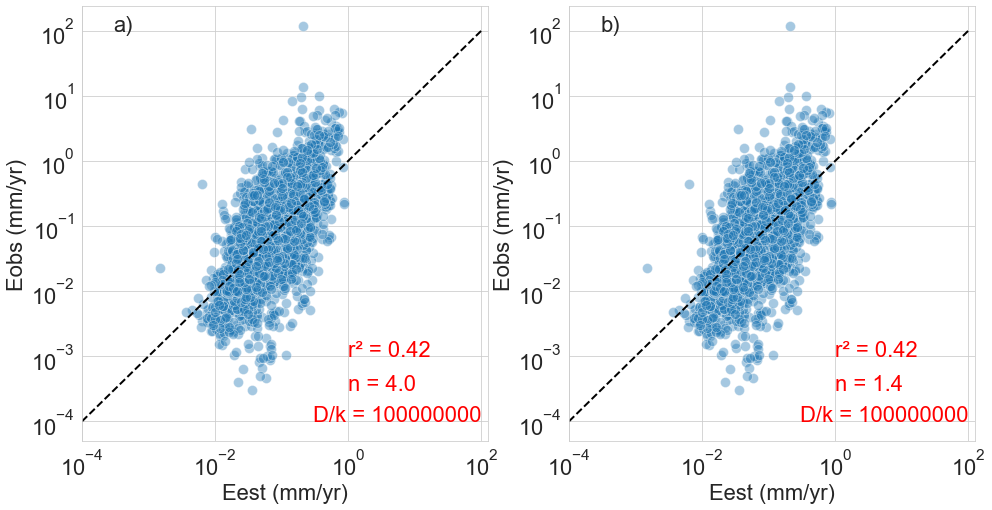

In [218]:
#sns.set_style("whitegrid")
fig,ax=plt.subplots(1,2,figsize=(16,8))

ds = [195,-42]
a['Eobs (mm/yr)'] = a['ebe_mmkyr'] / 1000

for i in range(2):
    plt.sca(ax[i])
    n1 = np.argsort(r2s)[ds[i]]
    a['Eest (mm/yr)'] = dfs[n1] *  np.exp(pcoef[n1]) #* np.exp(s2s[np.argmax(r2s)]/2)
    q=np.quantile(a['area'],.8)
    A = a['area'] > q

    a_big = a[A]
    a_smal = a[A==False]

    sns.scatterplot(data=a,x='Eest (mm/yr)',y='Eobs (mm/yr)', s=100, alpha=.4)

    xi = np.linspace(10**-4,10**2,1000)
    plt.plot(xi, xi,'k--',linewidth=2)
    plt.xlim([10**-4,10**2.1])
    plt.yscale('log')
    plt.xscale('log')
    r2s[n1]
    plt.text(1,.001,'r'+'2'.translate(superscript) + ' = ' + str(np.round(r2s[n1], 2)),c='r')
    plt.text(1,.0003,'n' + ' = ' + str(np.round(ns[n1], 2)),c='r')
    plt.text(.3,.0001,'D/k' + ' = ' + str(np.int32(diffus[n1]/1e-11)),c='r')
    plt.text(.0003,100,['a)','b)'][i])






(0.25, 0.5)

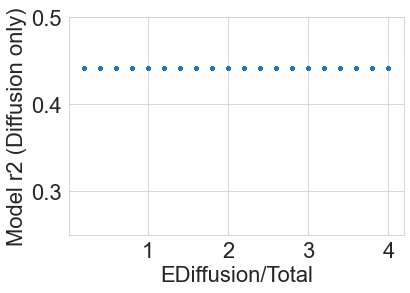

In [115]:
plt.plot(ns,r2s,'.')
plt.xlabel('EDiffusion/Total')
plt.ylabel('Model r2 (Diffusion only)')
plt.ylim([.25, .5])
#plt.xscale('log')
#plt.ylim([.36,.38])
#plt.xlim([0, 1])

0.3053809610213847

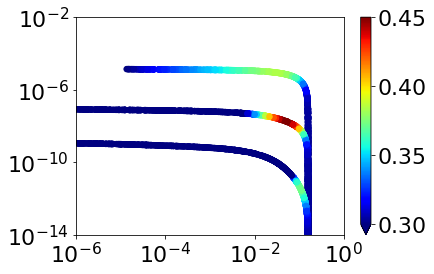

In [22]:
diffus1 = np.load('outputs/constant_n1/d.npy')
pcoef_d1 = np.load('outputs/constant_n1/k.npy')
r2s1 = np.load('outputs/constant_n1/r2.npy')

diffus2 = np.load('outputs/constant_n2/d.npy')
pcoef_d2 = np.load('outputs/constant_n2/k.npy')
r2s2 = np.load('outputs/constant_n2/r2.npy')

diffus3 = np.load('outputs/constant_n3/d.npy')
pcoef_d3 = np.load('outputs/constant_n3/k.npy')
r2s3 = np.load('outputs/constant_n3/r2.npy')

plt.scatter(diffus1*pcoef_d1/1e-8,pcoef_d1, c= r2s1,cmap='jet',s=30,vmin=.3,vmax=.45)
plt.scatter(diffus2*pcoef_d2/1e-8,pcoef_d2, c= r2s2,cmap='jet',s=30,vmin=.3,vmax=.45)
plt.scatter(diffus3*pcoef_d3/1e-8,pcoef_d3, c= r2s3,cmap='jet',s=30,vmin=.3,vmax=.45)

plt.xscale('log')
plt.yscale('log')
plt.ylim([10**-14,10**-2])
plt.xlim([.000001,1])
plt.colorbar(extend='min')
#plt.xlabel('D')
#lt.ylabel('k (t-1)')

In [1078]:
np.save('outputs/constant_n3/d',diffus)
np.save('outputs/constant_n3/k',pcoef_d)
np.save('outputs/constant_n3/r2',r2s)

In [1093]:
(4 +4) /  (-13 - -4)

-0.8888888888888888

(-1.0, 0.5)

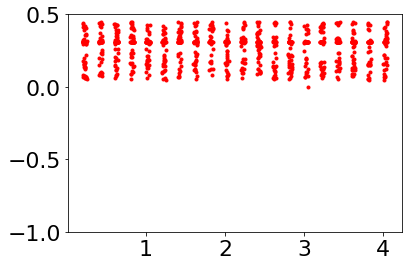

In [1312]:
pc_corr = np.exp(pcoef_d/2)*np.exp(pcoef)*1e-8
ns = ns+np.random.rand(len(ns))*.05
plt.plot(ns,r2s,'.',c='r')
#plt.xscale('log')
plt.ylim([-1,.5])

In [794]:
np.max(r2s)

0.45152196891103236

In [635]:
y[len(a)]

0.0

0.0641


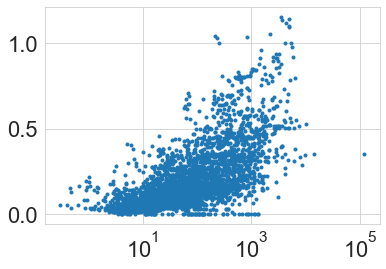

In [116]:
w = np.where(r2s>.1)[0][40]
print(diffus[w])
y = dfs[w]
plt.plot(a['ebe_mmkyr'], y[:len(a)],'.')
plt.xscale('log')
#plt.yscale('log')

In [668]:
np.max(r2s)

0.3728017849852585

Text(0, 0.5, 'r²')

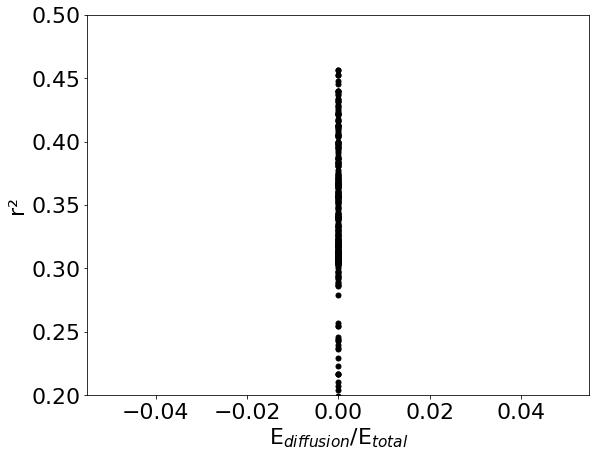

In [116]:

fig,ax = plt.subplots(figsize=(9,7))
plt.plot(dratave,r2s,'.k',markersize=10)

#plt.xscale('log')
#plt.xlim([0, 1])
#
plt.ylim([.2, .5])
plt.xlabel('n')
plt.xlabel('E' + '$_{diffusion}$'.translate(subscript) + '/' + 'E' + '$_{total}$'.translate(subscript) )
#plt.xlabel('Critical area (km' +'2'.translate(superscript)+')')
plt.ylabel('r'+'2'.translate(superscript))
#plt.ylabel('log(D/k)')
#plt.xlim(([0, 2.5]))


In [348]:
a['log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)])
a['(residual (m/Myr))'] = a['ebe_mmkyr']/1000 - dfs[np.argsort(r2s)[-1]][:len(a)]
# a['log(erate (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000)
# a['log(residual (m/Myr))'][a['log(residual (m/Myr))'].isna()] = np.nan
# a['log(residual (m/Myr))'][np.abs(a['log(residual (m/Myr))']) > 1e7] = np.nan
# a['log(err (m/Myr))'] = np.log10(a['ebe_err'])

# a['norm log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]) / a['log(erate (m/Myr))']
# a['norm log(err (m/Myr))'] = np.log10(a['ebe_err']) / a['log(erate (m/Myr))']

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2018/3705599146.py:1: RuntimeWarning: divide by zero encountered in log10
  a['log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)])


AttributeError: 'list' object has no attribute 'lower'

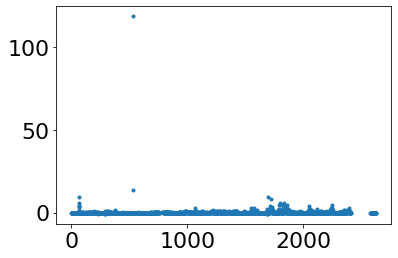

In [349]:
plt.plot(a['(residual (m/Myr))'].to_numpy(),'.')
plt.yscale([-10, 10])

1.2205666630032361

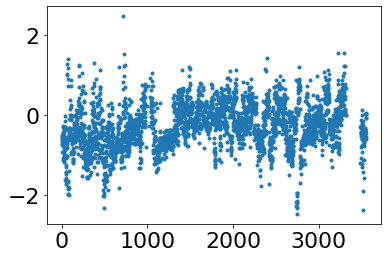

In [119]:
plt.plot(a['log(residual (m/Myr))'] ,'.')
s2 = np.mean(a['log(residual (m/Myr))'].to_numpy()[a['log(residual (m/Myr))'] < 1000000]**2)
np.exp(s2/2)

In [ ]:
g = sns.regplot(data = a, x = 'log(erate (m/Myr))',y='log(err (m/Myr))', scatter_kws={'alpha':0.3},line_kws={'color':'k'})

KeyError: 'log(err (m/Myr))'

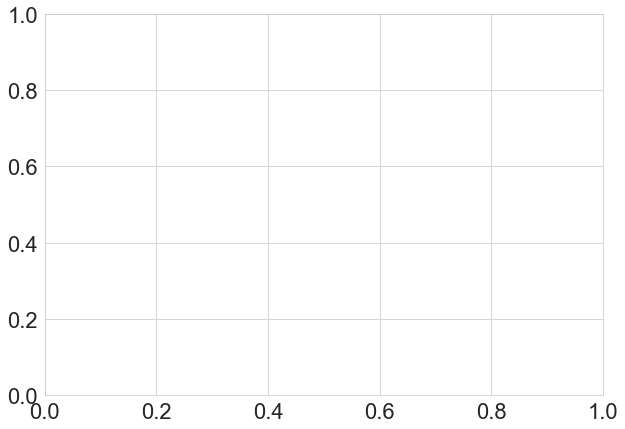

In [820]:
fig,ax = plt.subplots(figsize=(10,7))
a2 = pd.DataFrame()
import scipy as sp
p2 = 'log(residual (m/Myr))'
p1 = 'log(err (m/Myr))'
#p2 = 'log(erate (m/Myr))'
#p1 = 'log(residual (m/Myr))'
g = sns.regplot(data = a, x = p1,y= p2, scatter_kws={'alpha':0.3},line_kws={'color':'k'})
y=a[p2][~np.logical_or(np.isnan(a[ p2]),np.isnan(a[p1]))]
x=a[p1][~np.logical_or(np.isnan(a[ p2]),np.isnan(a[p1]))]
y=y[np.logical_not(np.logical_or(np.isinf(y),np.isinf(x)))]
x=x[np.logical_not(np.logical_or(np.isinf(x),np.isinf(x)))]

r, p = sp.stats.pearsonr(x,y)

plt.text(-1,2,'r² = '+str(np.round(r,2)))
plt.show()

KeyError: 'norm log(residual (m/Myr))'

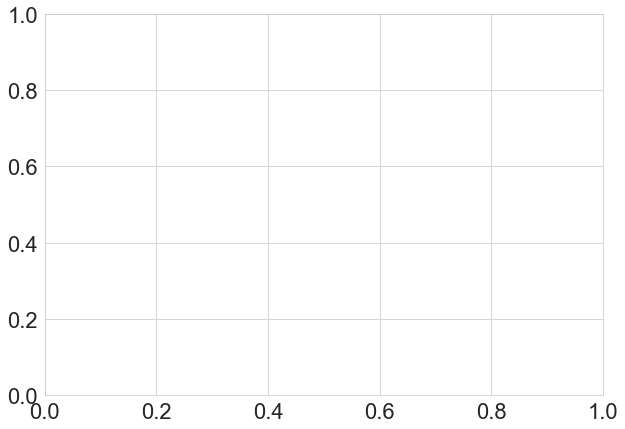

In [821]:
fig,ax = plt.subplots(figsize=(10,7))

import scipy as sp
g = sns.regplot(data = a, x = 'norm log(residual (m/Myr))',y='norm log(err (m/Myr))', scatter_kws={'alpha':0.3},line_kws={'color':'k'})
a[ 'log(residual (m/Myr))'][np.isnan(a[ 'log(residual (m/Myr))'])] = 0
a[ 'log(err (m/Myr))'][np.isnan(a[ 'log(err m/Myr)'])] = 0
plt.xlim([-50, 50])
plt.ylim([-50, 50])
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['log(residual (m/Myr))'], data['log(err m/Myr)'])
    ax = plt.gca()
    
    return r
plt.text(-1,4,'r² = '+str(np.round(annotate(a),2)))
plt.show()

5.800966333320803

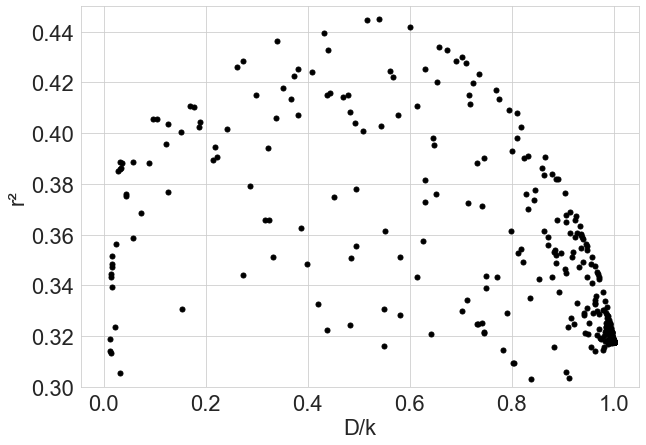

In [234]:
log = np.log10
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(dratave*1000,r2s,'.k',markersize=10)
#plt.xscale('log')
plt.xlabel('D/k')
#plt.xlim([1,10**8])
plt.ylim([.3, .45])
plt.ylabel('r'+ '2'.translate(superscript))
diffus[np.argmin(r2s)]/ks[np.argmin(r2s)]

In [236]:
dratave[np.argmax(r2s)] * 1000

0.5387698154886729

Text(0.5, 0, 'D/k ratio')

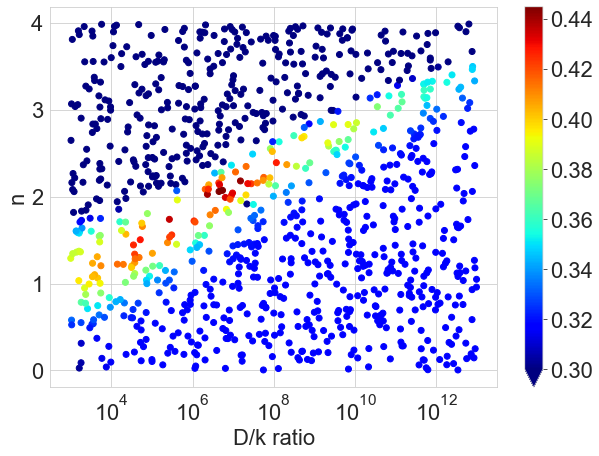

In [180]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/1e-8*1000,ns,c=r2s,cmap='jet',vmin = .3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

In [185]:
diffus[np.argmax(r2s)]/1e-8

5474.462756323523

Text(0.5, 0, 'D/k ratio')

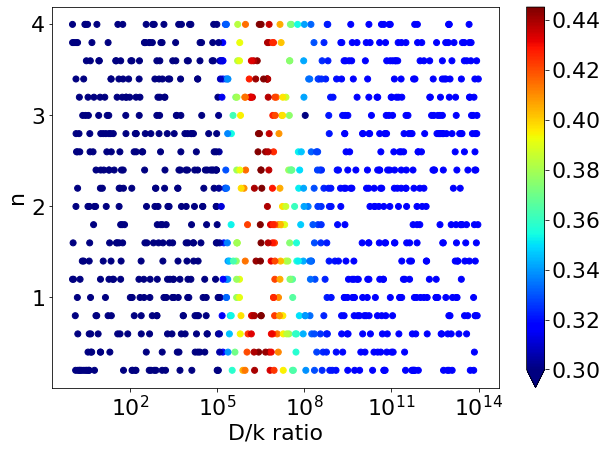

In [350]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/1e-8,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

In [787]:
ns[np.argmax(r2s)]

1.9999999999999998

Text(0, 0.5, 'r²')

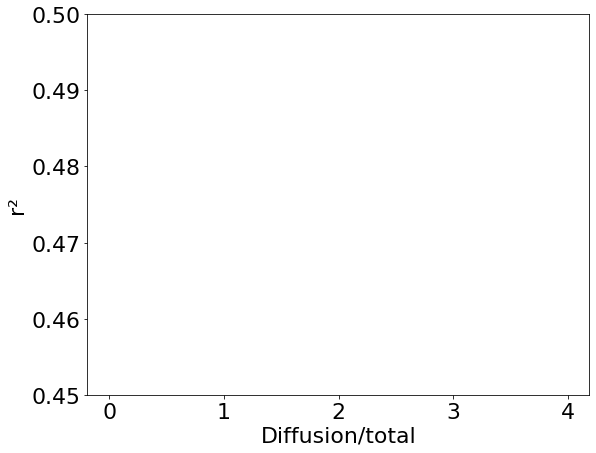

In [124]:
fig,ax = plt.subplots(figsize=(9,7))
plt.plot(ns,dratave,'.k')
#plt.xscale('log')
plt.ylim([.45,.5])
plt.xlabel('Diffusion/total')
plt.ylabel('r'+ '2'.translate(superscript))

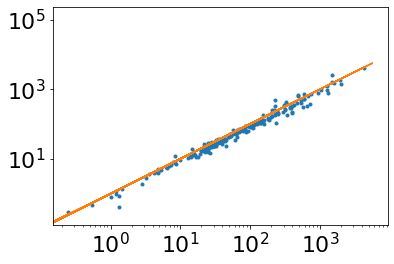

In [125]:
plt.plot(a['eal_mmkyr'],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')
plt.plot(a['eal_mmkyr'], a['eal_mmkyr'])

In [126]:
pcoef_d[np.argsort(r2s)[-1]]

1.6634645135932693

In [127]:
np.max(r2s)

0.4563722865128347

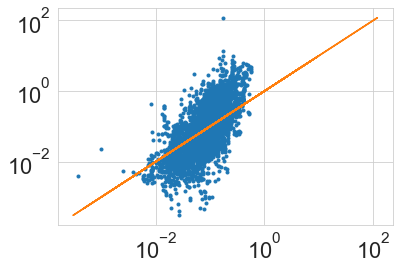

In [117]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef_d[np.argsort(r2s)[-1]]/2)*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')



In [ ]:
from sklearn.linear_model import 

In [31]:
r = np.log(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]])) -np.log(a['ebe_mmkyr']/1000)

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_10459/1739030071.py:1: RuntimeWarning: divide by zero encountered in log
  r = np.log(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]])) -np.log(a['ebe_mmkyr']/1000)


In [38]:
np.sqrt(np.sum(r[np.abs(r)<10]**2))/len(r[np.abs(r)<10])

NameError: name 'r' is not defined

2.2972948000228746

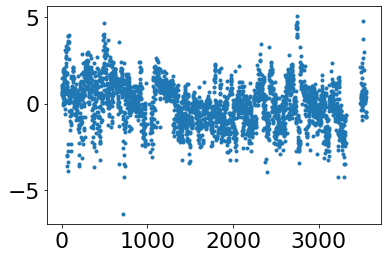

In [72]:
plt.plot(r,'.')
np.exp(np.sum(r[np.abs(r) < 10] ** 2) / len(r[np.abs(r) < 10]) / 2)

In [ ]:
mm/yr = m / kyr

In [28]:
np.exp(pcoef[np.argsort(r2s)[-1]])

0.511276160095673

In [25]:
dfs[np.argsort(r2s)[-1]][:len(a)]

array([0.        , 0.03032306, 0.0336224 , ..., 0.01139245, 0.01047059,
       0.01073412])

In [89]:
np.max(a['ebe_mmkyr']/1000)

118.86446000000001

In [34]:
r = np.abs(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]) - a['ebe_mmkyr']/1000)
r[np.isnan(r)] = 0
ls = np.argsort(r)
ls = np.array(ls)
#np.max(ls[np.logical_not(np.isnan(ls))])

In [149]:
bads = pd.DataFrame()
#ls = np.sort(np.abs(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]) - a['ebe_mmkyr']/1000)).values

for i in range(1,100):
    l = ls[-i]
    bads = bads.append(a.iloc[l:l+1])

In [151]:
bads.to_csv('/users/gr_1/Documents/largest_residuals.csv')

In [36]:
np.abs(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))[np.argmax(a['ebe_mmkyr'])]

0.19408470091980498

Text(0, 0.5, '¹⁰Be erosion rate(m/Myr)')

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8304 missing from current font.
  font.set_text(s, 0, flags=flags)


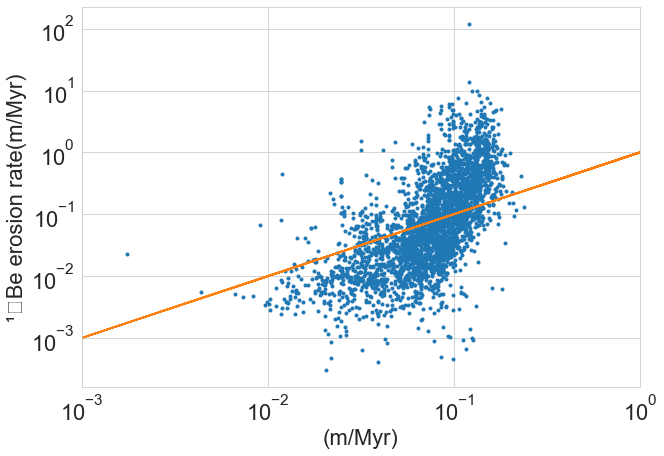

In [66]:
fig,ax = plt.subplots(figsize=(10,7))

plt.plot(dfs[10][:len(a)]*np.exp(pcoef[10]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**-3, 1])
plt.xlabel('(m/Myr)')

plt.ylabel('10'.translate(superscript) + 'Be erosion rate(m/Myr)')

3.9585571312955783


2.165202173264339

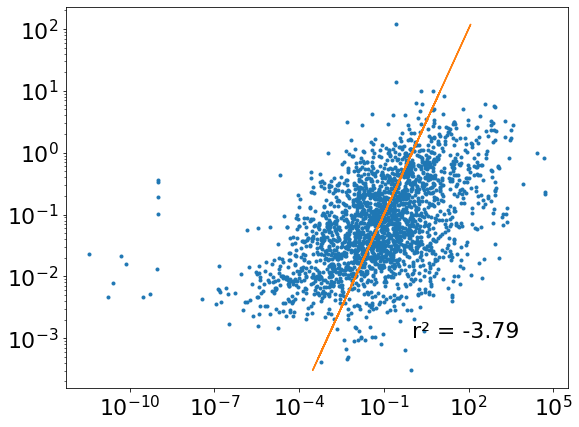

In [38]:
plt.subplots(figsize=(9,7))
n1 = 998# Xth worst estimate
plt.plot(dfs[np.argsort(r2s)[-n1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-n1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.text(1,.001, 'r' + '2'.translate(superscript) + ' = ' + str(r2s[np.argsort(r2s)[-n1]])[:5])
plt.xscale('log')
plt.yscale('log')
print(ns[np.argsort(r2s)[-n1]])
diffus[np.argsort(r2s)[-n1]]/ks[np.argsort(r2s)[-n1]]

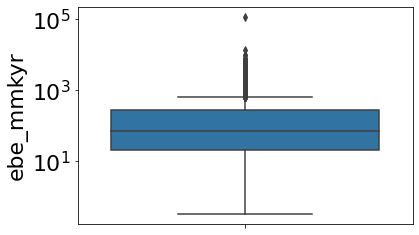

In [688]:
sns.boxplot(data=a,y ='ebe_mmkyr')
a['log(ebe_mmkyr)'] = np.log10(a['ebe_mmkyr'])
plt.yscale('log')

In [228]:
diffus[np.argmax(r2s)]/ks[np.argmax(r2s)]

1804.5545601198119

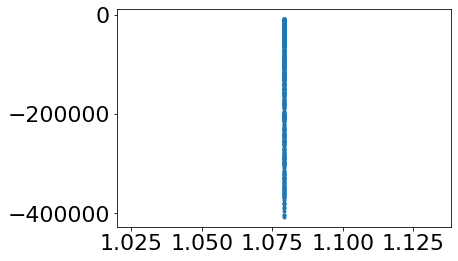

In [497]:
plt.plot(np.log10(careas),resid,'.')
#plt.ylim([.2, .5])

In [156]:
l = np.log10(diffus/ks)
plt.hist(l[r2s>.3])
#plt.plot(np.log10(diffus/ks),r2s,'.')
#plt.ylim([.2, .5])

ValueError: operands could not be broadcast together with shapes (200,) (3600,) 

NameError: name 'areas' is not defined

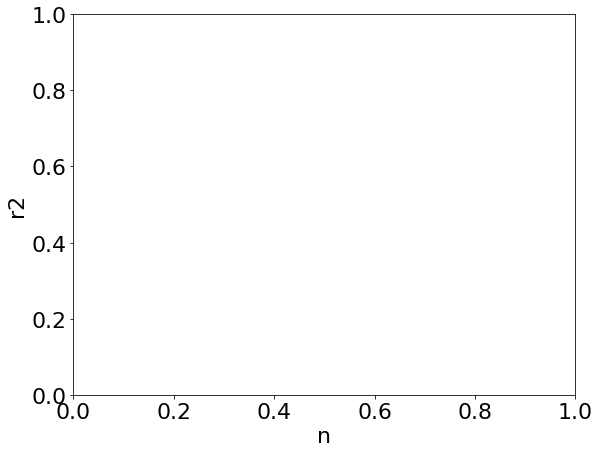

In [34]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.xlabel('n')
plt.ylabel('r2')
plt.scatter(ns,r2s,10,c=a[areas])
plt.ylim([0,.5])
#plt.xscale('log')
#plt.yscale('log')


In [825]:
ns[np.argmax(r2s)]

2.060090188998529

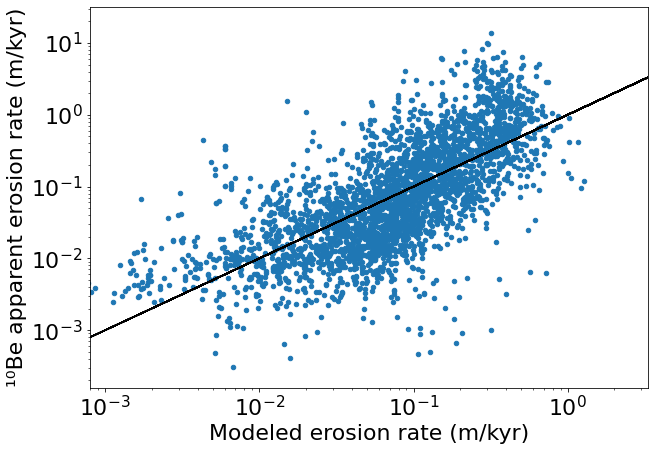

In [72]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.1,10**.52])
plt.ylim([10**-3.8,10**1.5])
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))
plt.xscale('log')
plt.yscale('log')
#plt.colorbar()

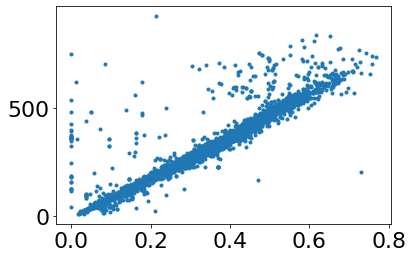

In [966]:
plt.plot(slps2[:3553], a['slp_ave'], '.')

NameError: name 'slps2' is not defined

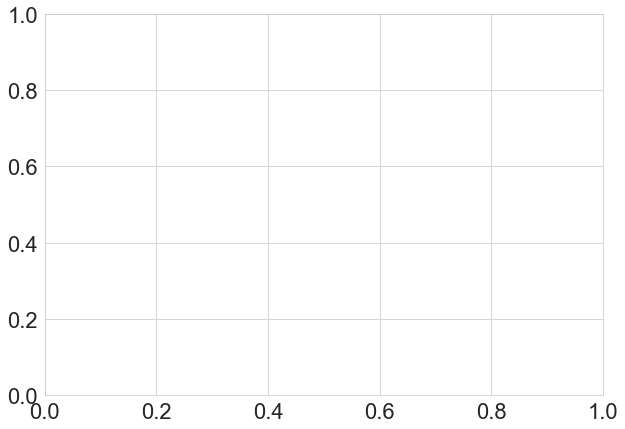

In [165]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
#plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
r = lm.LinearRegression()
x = np.array(slps2[:3553])
x = np.log10(x)
y = a['ebe_mmkyr'].to_numpy()
y = np.log10(y)
isn = np.logical_and(np.logical_not(np.isnan(x)), np.logical_not(np.isnan(y)))
isi = np.logical_and(np.logical_not(np.isinf(x)), np.logical_not(np.isinf(y)))
isni = np.logical_and(isn,isi)
x = x[isni]

y = y[isni]
r= r.fit(x.reshape(-1,1),y)
y2 = r.predict(x.reshape(-1,1))
print(sklearn.metrics.r2_score(y.reshape(-1,1),y2.reshape(-1,1)))
plt.plot(10**x,10**y,'.')
plt.xlim([10**-2,10**0])
plt.plot(10**x,10**y2,linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))

#plt.colorbar()

NameError: name 'slps2' is not defined

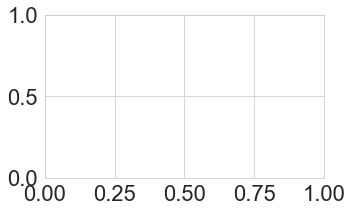

In [164]:
fig, ax = plt.subplots(figsize = (5,3))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553][slps2[:3553]>0],a['slp_ave'][slps2[:3553]>0]/1000,c='k', s=1)
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
plt.xlabel('Slope D8')
plt.ylabel('Slope Octopus')

#plt.xscale('log')
#plt.yscale('log')


In [56]:
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)>.2)[0]) 

50

In [138]:
#slps1 = gpd.read_file('basins_aspect_means_0 (2).csv')
#slps1 = pd.to_numeric(slps1['slp_ave'],errors='coerce')

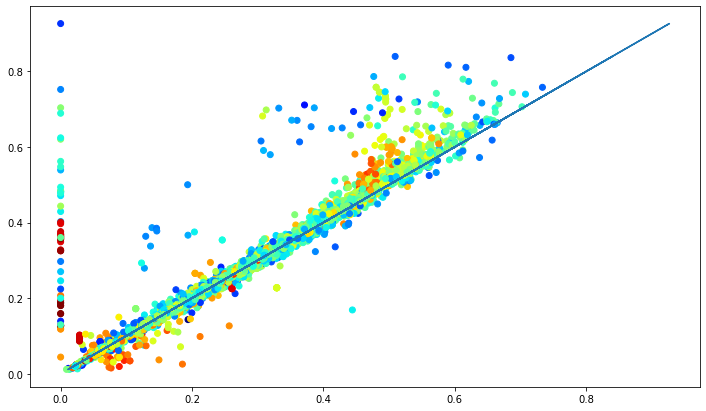

In [218]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['slp_ave']/1000,c=np.log10(a['area']),cmap='jet')
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
#plt.yscale('log')


In [225]:
np.argmax((slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000))

2145

In [158]:
plt.hist((np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)))
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000) > .05)[0])

NameError: name 'slps2' is not defined

NameError: name 'slps2' is not defined

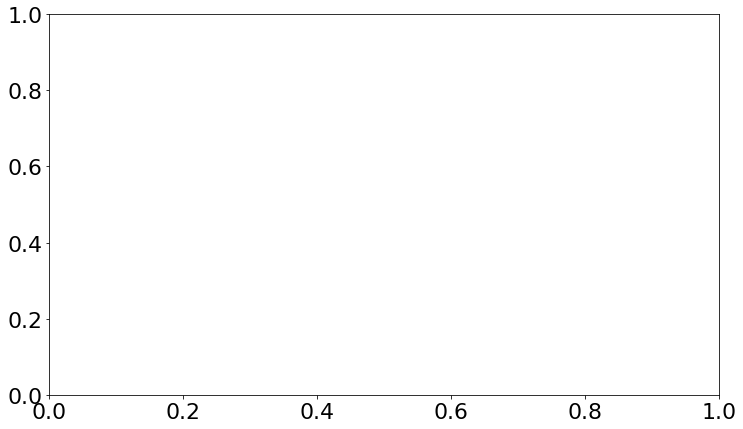

In [767]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')
plt.yscale('log')

<ipython-input-193-a1e92631e24c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], '.')


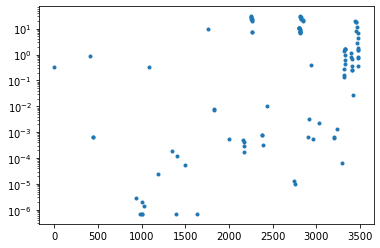

In [193]:
plt.yscale('log')

<ipython-input-195-77bdca639977>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[a['area']>0], '.')
<ipython-input-195-77bdca639977>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')


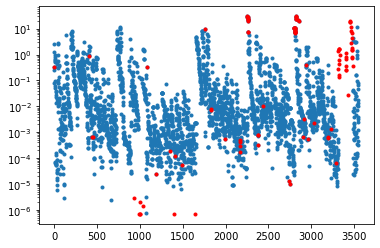

In [195]:
plt.plot(a.area[a['area']>0], '.')
plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')

plt.yscale('log')

In [189]:
np.mean(a['area'][a['area']>0])

3705.5099137177367

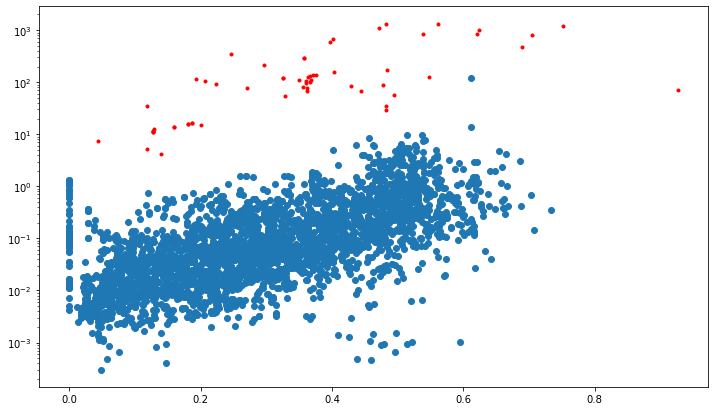

In [183]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000)#,c=(a.centroid.y))
#plt.scatter(a['slp_ave']/1000, a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')

#plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
plt.yscale('log')
plt.plot(a['slp_ave'][slps2[:3553]==0]/1000, a['ebe_mmkyr'][slps2[:3553]==0], 'r.')

In [85]:
dfs[np.argsort(r2s)[-1]]

array([0.        , 0.02312291, 0.02453309, ..., 0.        , 0.        ,
       0.        ])

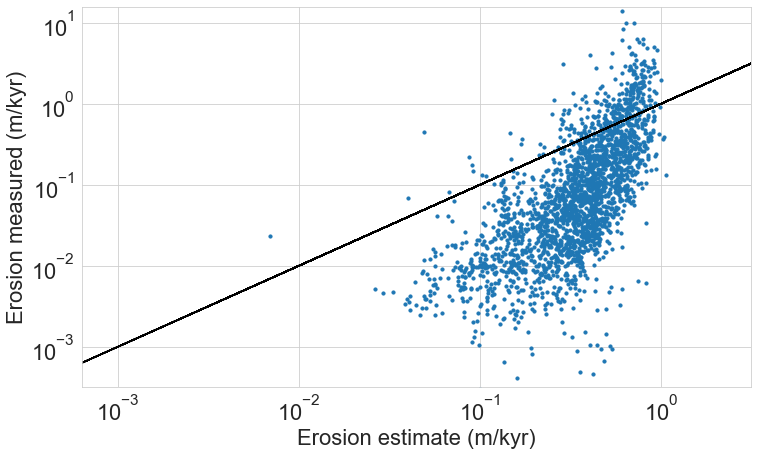

In [163]:
fig, ax = plt.subplots(figsize = (12,7))
r2s = -resid
plt.scatter(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,s=10)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.2,10**.5])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
#c = plt.colorbar()
#c.set_label('log(Drainage area (km)' + '2'.translate(superscript) + ')')

In [92]:
from scipy.stats import bartlett

(0.0, 5.0)

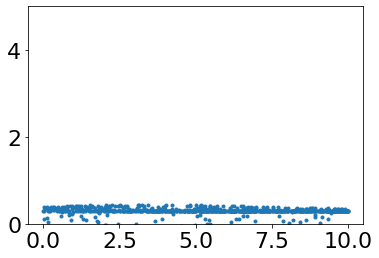

In [241]:
plt.plot(np.log10(diffus/ks),r2s,'.')
plt.ylim([0,5])

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/4223691936.py:4: RuntimeWarning: divide by zero encountered in log10
  a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/4223691936.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 10**6])


(0.013385378085027523, 1000000)

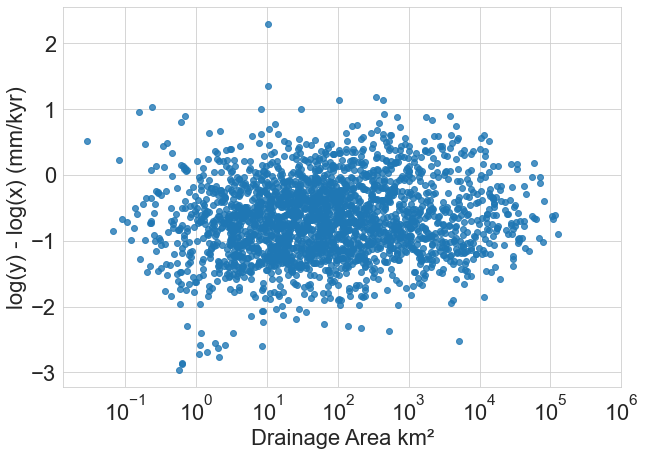

In [166]:
import seaborn as sns
plt.subplots(figsize = (10,7))
a['resid'] = 1
a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
loc = a.index[np.isinf(a['resid'])]
#a['bio12'][loc] = 0
sns.regplot(data=a,x='area',y='resid',fit_reg=True,scatter=True)
plt.xscale('log')
plt.xlabel('Drainage Area ' + 'km' +'2'.translate(superscript))
plt.ylabel('log(y) - log(x) (mm/kyr)')
plt.xlim([0, 10**6])


In [ ]:
a['Residuals'] = np.log(a['ebe_mmkyr']/1000) - 

In [149]:
a2 = a.loc[~a['resid'].isna()]
a2 = a2.loc[~a2['area'].isna()]
a2 = a2.loc[~(a2['resid']>1e20)]
a2 = a2.loc[~(a2['area']>1e20)]
a2 = a2.loc[~(a2['resid']<-1e20)]
a2 = a2.loc[~(a2['area']<-1e20)]

In [151]:
p1 = a2['resid'][a2['area']>10**3].to_numpy()
p2 = a2['resid'][a2['area']<=10**3].to_numpy()

bartlett(p1,p2)

BartlettResult(statistic=4.28507663992576, pvalue=0.038448349142781967)

In [1481]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

array([   0,   37,  113,  114,  408,  447,  449,  467, 1071, 1072, 1089,
       1184, 1349, 1391, 1407, 1474, 1494, 1671, 1765, 1832, 1833, 1999,
       2166, 2169, 2172, 2174, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2381, 2382, 2385, 2433, 2746, 2751, 2803, 2804, 2805,
       2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2818, 2819,
       2820, 2821, 2822, 2851, 2852, 2905, 2912, 2939, 2967, 3028, 3199,
       3200, 3236, 3291])

In [ ]:
plt.scatter(np.log10(a['area']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.subplots(figsize=(5,5))
plt.scatter(np.log10(a['slp_ave']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.figure()
plt.scatter(np.log10(a['ebe_mmkyr']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)


In [153]:
import numpy as np
## Figures
folder = 'results/var_concavity_1//'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

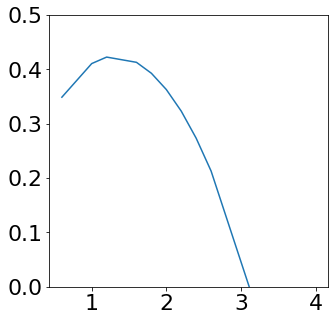

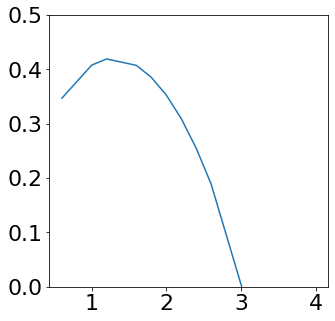

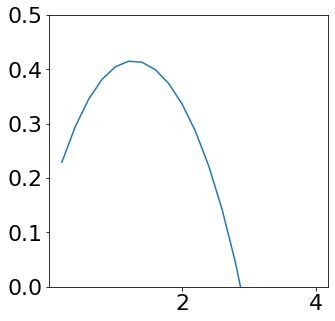

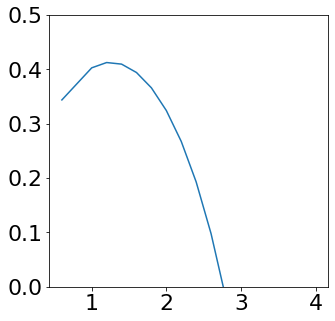

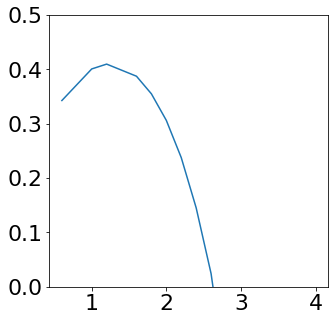

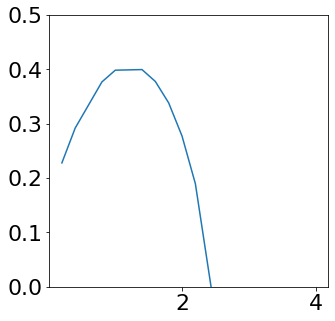

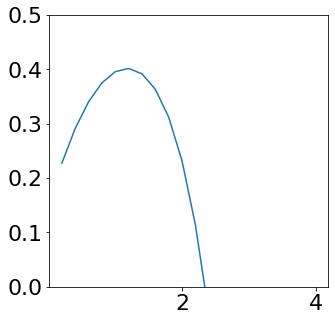

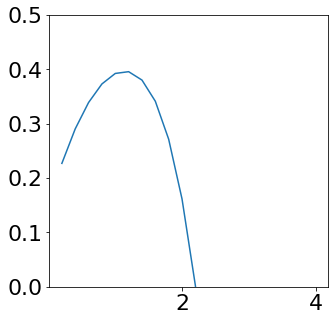

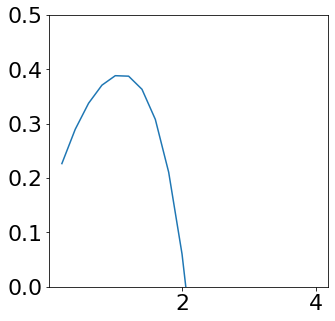

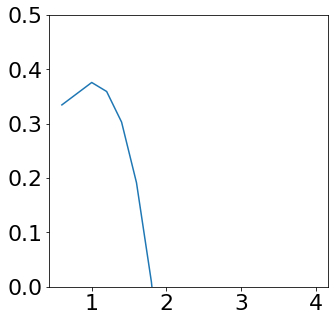

In [508]:
ss = np.unique(np.round(ms/ns,2))
o = np.zeros(len(ss))
for c,s in enumerate(ss):
    fig,ax = plt.subplots(figsize=(5,5))
    I = np.where(ms/ns==s)[0]
    plt.plot(ns[I],r2s[I])
    plt.ylim([0, .5])
    o[c] = np.max(r2s[I])
    c+=1


## Compare w/ bio data

In [273]:
# maybe ... 
# a2 = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')
# a2 = a2.loc[a.index]
# a = a2
#a.index = range(len(a))
#a.index
#a.index = range(len(a))
#a = a[(a['ebe_mmkyr']>0)]

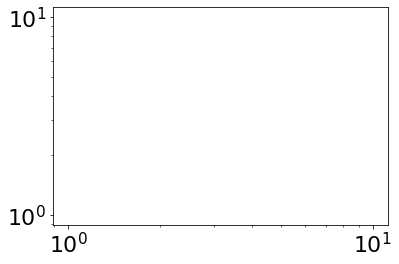

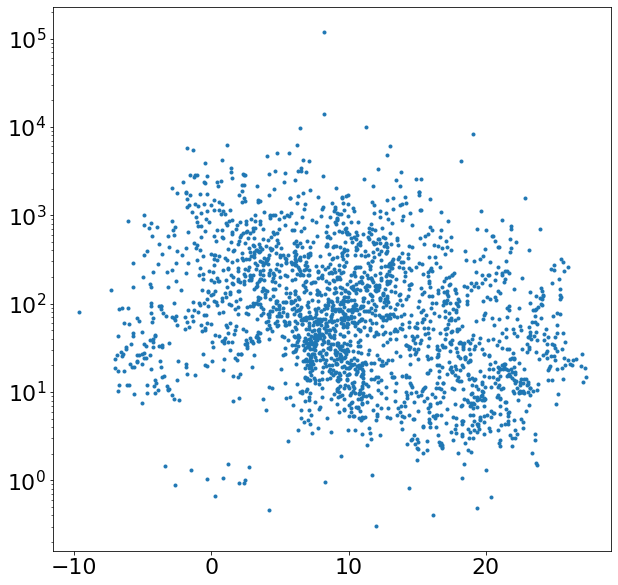

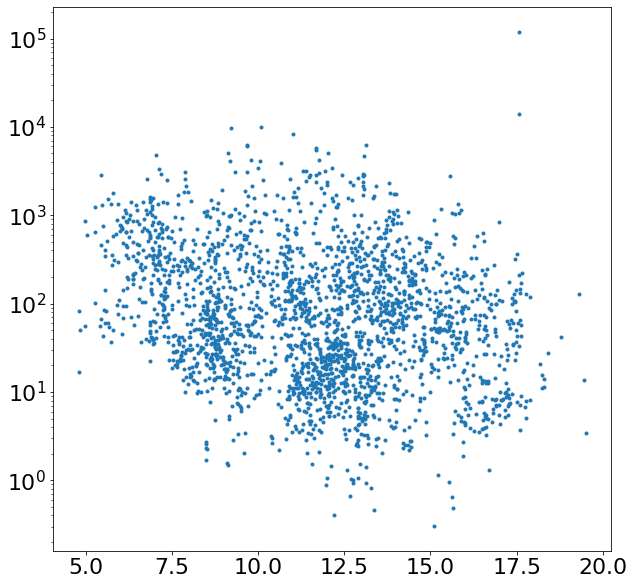

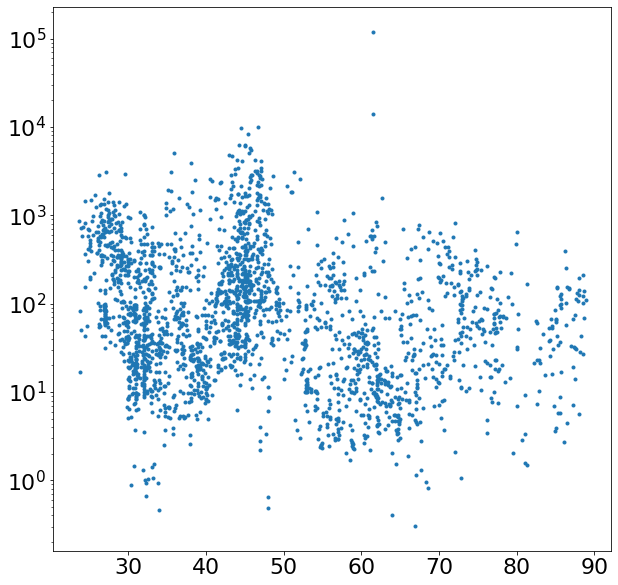

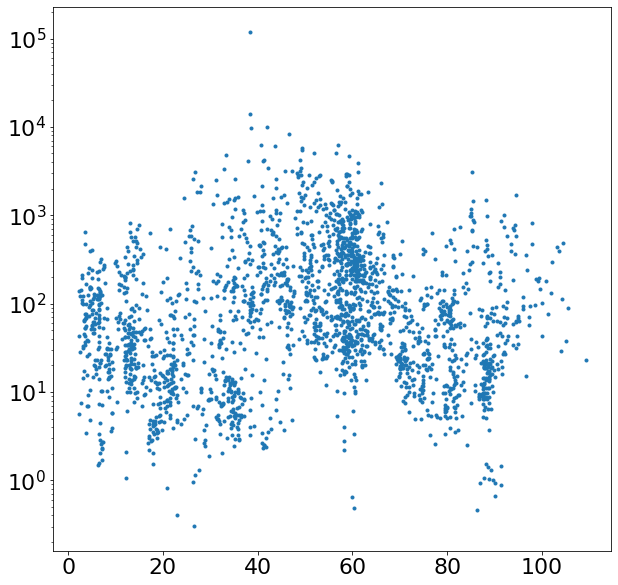

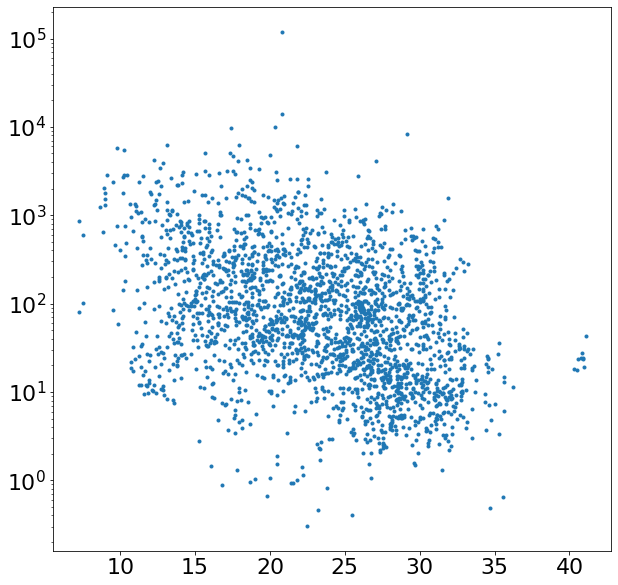

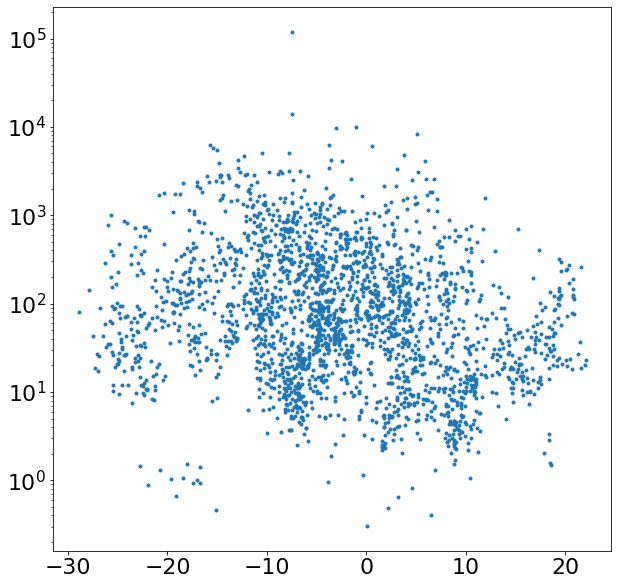

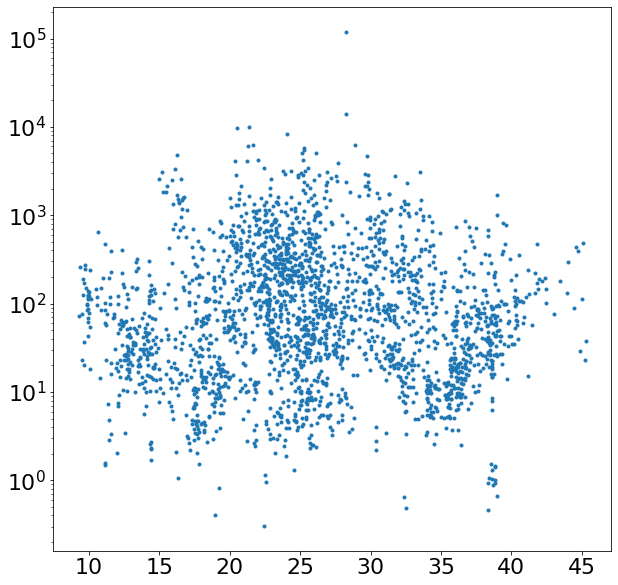

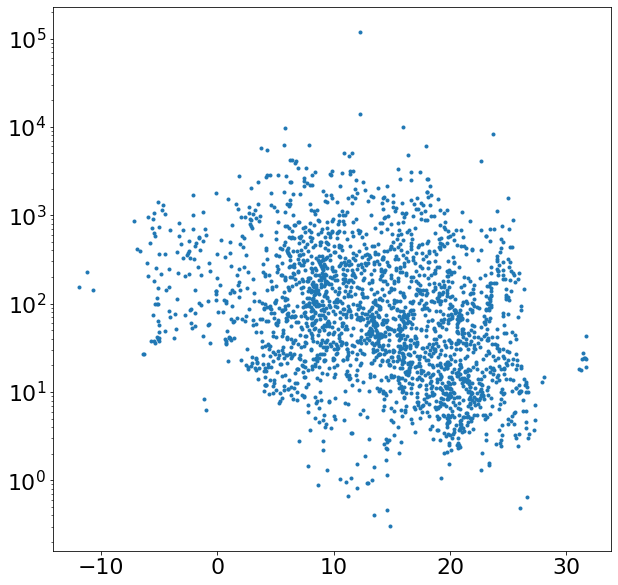

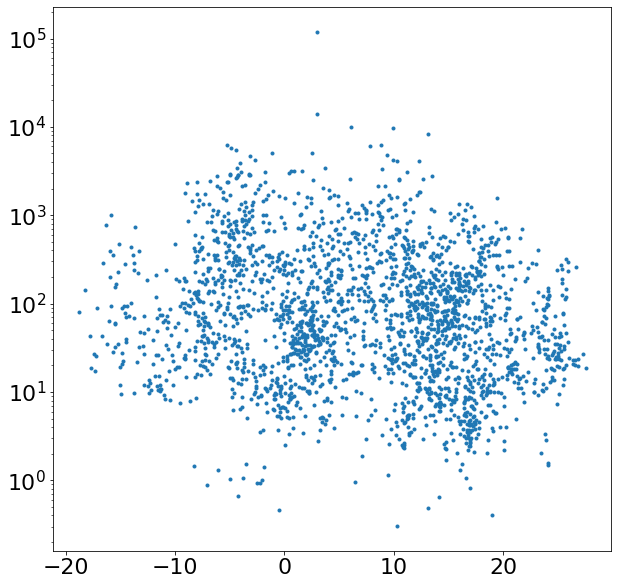

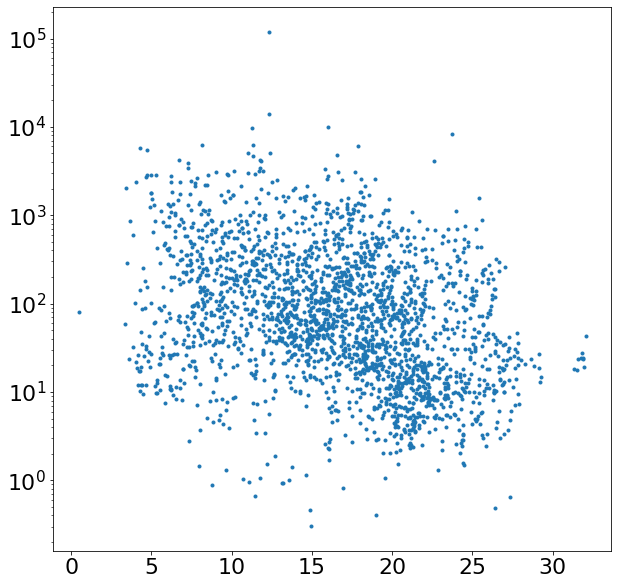

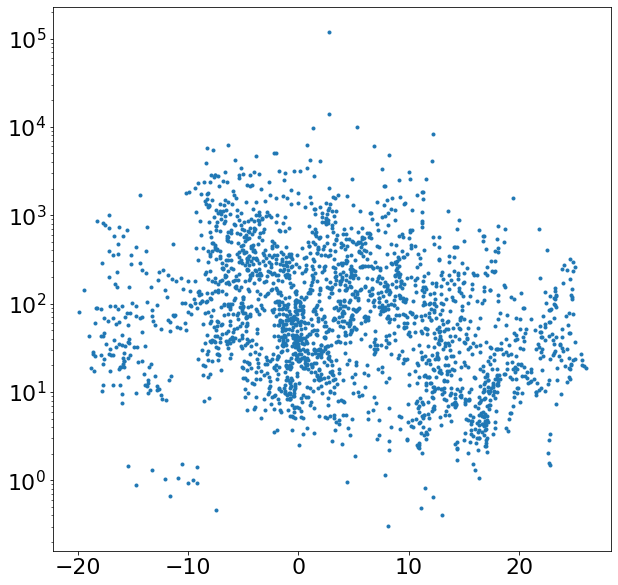

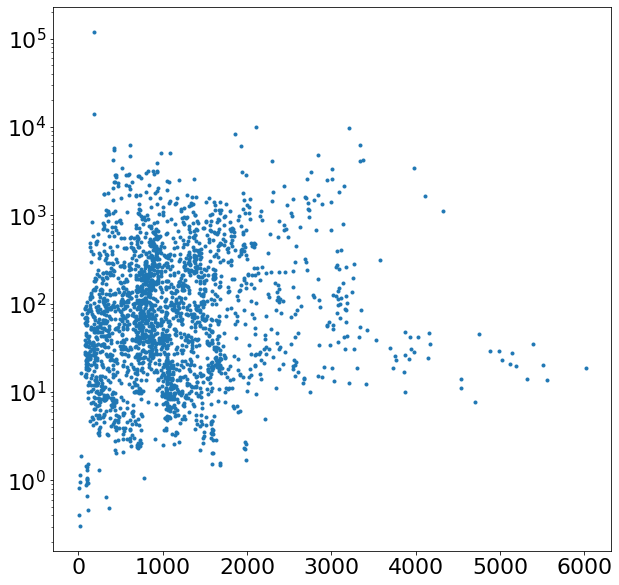

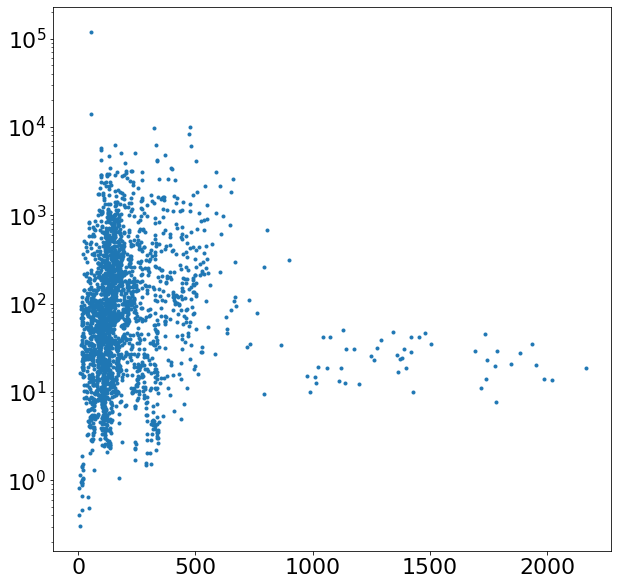

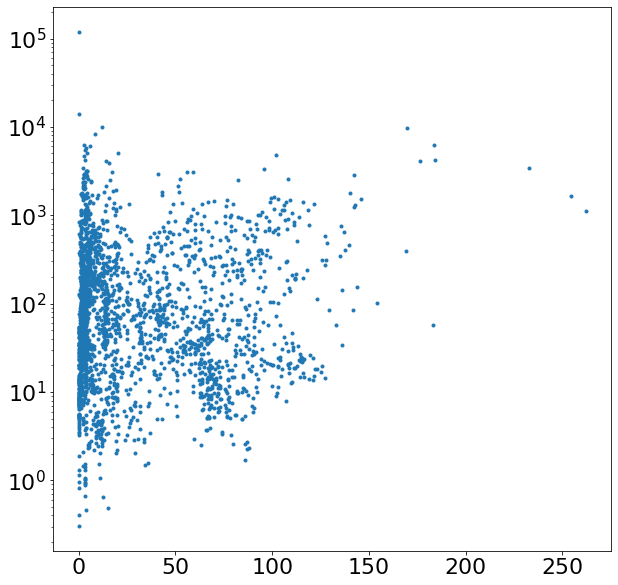

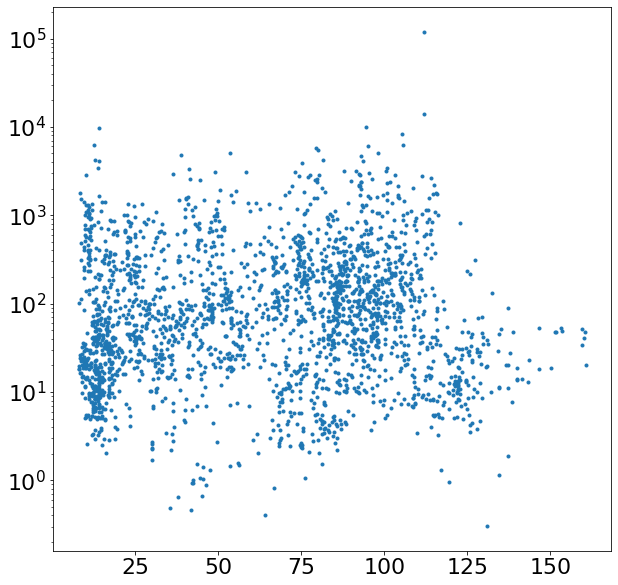

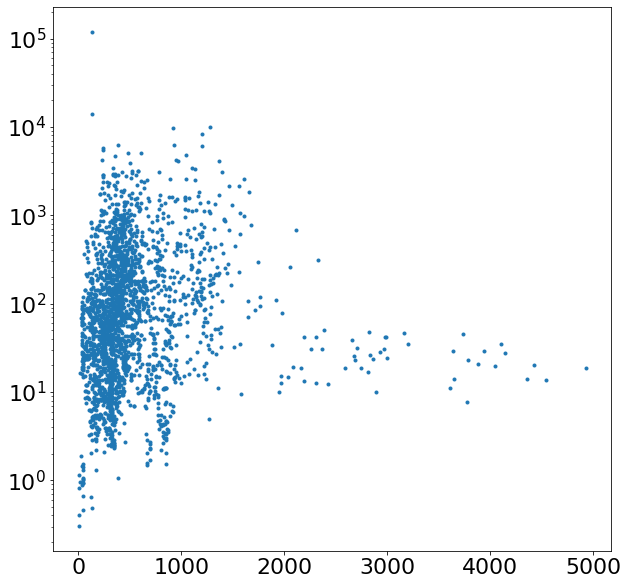

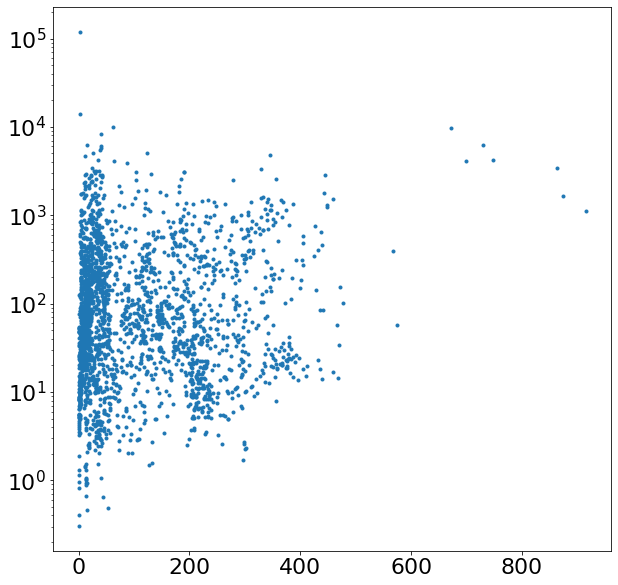

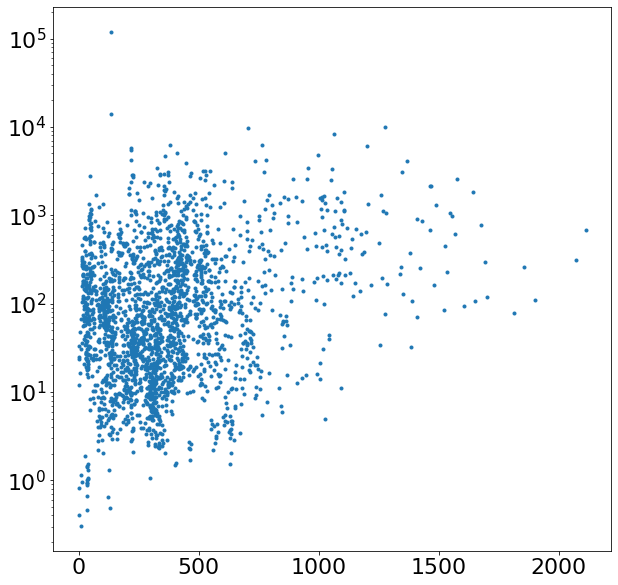

In [14]:
import seaborn as sns
scales = [0,10,10,1,100,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1]
a['realid'] = a.index

for i in range(1,19):
    n = pd.read_csv('/Users/gr_1/Google Drive_1/data_earth_engine/basins_bio_{}.csv'.format(str(i)))
    if i == 1:
        ns1 = n
    #ns['bio'+str(i)] = n['mean']
    # a['ebe_mmkyr'] = np.round(a['slp_ave'],4)
   # n['ebe_mmkyr'] = np.round(n['ebe_mmkyr'],4)
    #n['slp'] = a['slp_ave']
    plt.xscale('log')
    plt.yscale('log')
    n.index = n['realid']
    a['bio' + str(i)] = 0
    #a['bio' + str(i)] = n['mean']/scales[i]
    a['bio' + str(i)] = n['mean']/scales[i]
    #sns.scatterplot(data=a,x='bio' + str(i),y='ksn')
    n.index = range(len(n))
    #a2['bio_old'+str(i)] = n['mean']
for i in range(1,19):
    fig,ax = plt.subplots(figsize=(10,10))

    plt.plot(a['bio' + str(i)],a['ebe_mmkyr'],'.')
    #plt.xscale('log')
    plt.yscale('log')

   # plt.ylim([1, 100])



In [15]:
import jenkspy
#a['meantempclass'] = pd.qcut(a['bio12'],4)
#a['meantempclass'] = pd.cut(a['bio12'],[0,1000,2000,4000,np.Inf])
#a['meantempclass'] = pd.cut(a['bio15'],[0,50,100,150,np.Inf])

#breaks = jenkspy.jenks_breaks(a['bio12'], nb_class=5)
if 0:
    r1 =  np.power(10.0,np.float64(list(np.arange(-2,6,1.75)))).tolist()
    #r1.insert(0,10**-2)
    #r1.insert(len(r1)+1,10**6)
    a['area'][np.isnan(a['area'])] = 0
    a['elev_ave'][a['elev_ave'] == 0] = np.nan
    a['meantempclass'] = pd.cut(a['elev_ave'],5)
    a['meantempclass']

a['meantempclass'] = pd.cut(a['bio12'],[0,500,1000,1500,2300,3000,500000])
#a['meantempclass'] = list(zip(pd.qcut(a['bio12'],3), pd.qcut(a['bio1'],3)))
#a['meantempclass'] = pd.qcut(a['bio1'] - a['bio14'], 10)


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/1040685795.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a2.geometry = a.geometry.centroid


<AxesSubplot:>

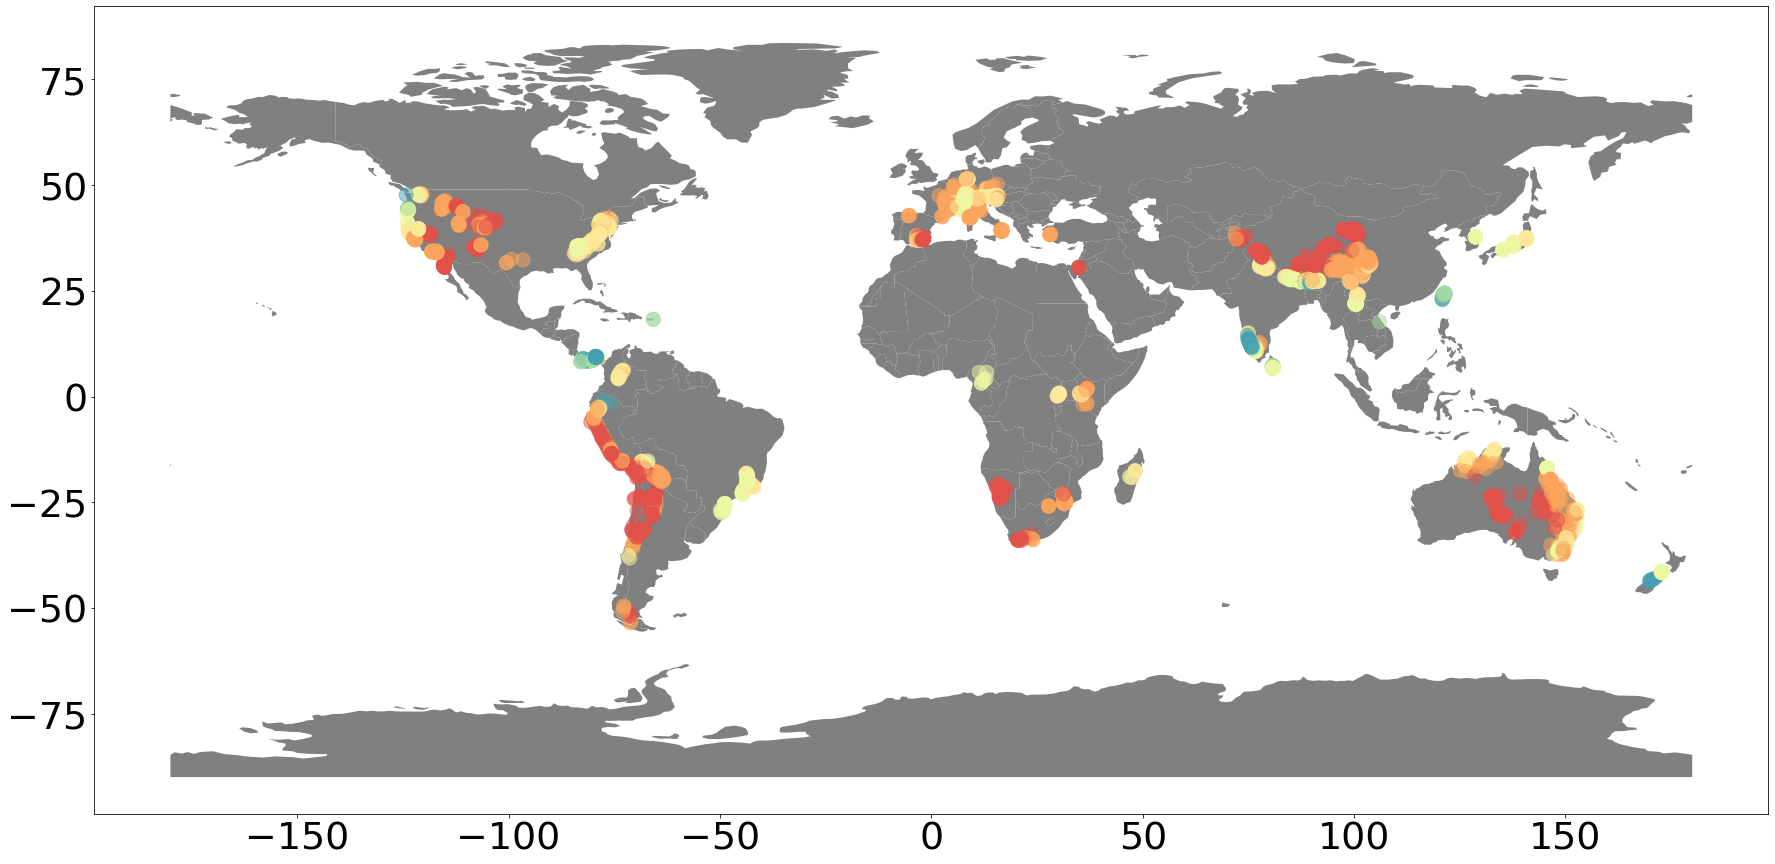

In [16]:
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 38})
fig,ax = plt.subplots(figsize=(30,15))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = a['meantempclass']
a2 = a.copy()
a2.geometry = a.geometry.centroid

a2 = a2[~a2['geo'].isna()]
a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("Spectral").as_hex()[:7]),alpha=.5,s=200)
#plt.imshow(f)

In [17]:
if 0:
    lith = gpd.read_file('/users/gr_1/Downloads/LiMW_GIS 2015.gdb')
    lith = lith.to_crs(a.crs)
    l = []
    for i in range(len(c)):
        l.append(lith[lith.contains(c[i])]['xx'])
        print(i/len(c))

In [41]:
lith = 1
l1 = np.load('geo_classes.npy',allow_pickle=True)
if lith:
    a['meantempclass'] = l1

In [112]:
## tectonic regimes
if 0:
    a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

    t = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/tectonic_region/')
    a['meantempclass'] = -1
    mt1 = np.zeros(len(a))
    for i in range(len(a)):
        try:
            mt1[i] = t.index[t.contains(a.geometry[i].centroid)][0]
        except:
            continue
    a['meantempclass'] = np.int32(mt1)

In [292]:
t.index = np.arange(len(t))
a.index = np.arange(len(a))
regions = t['region'][a['meantempclass']]
regions.index = np.arange(len(regions))
a['region'] = regions
a['id'] = range(len(a))

AttributeError: 'list' object attribute 'index' is read-only

In [19]:
## Unique cross-validation type thing
a.index = range(len(a))
a['meantempclass'] = pd.qcut(a.rank(method='first').x_wgs84,711,duplicates='drop')
a.index = range(len(a))

In [20]:
c=0
a['id'] = range(len(a))
groups = np.zeros((1000,1000))
bslen=[]
for i,b in a.groupby('meantempclass'):
    for j in range(len(b)):
        groups[c,j] = np.int32(b.iloc[j]['id'])
    bslen.append(len(b))
    c+=1



In [21]:
m,n = np.shape(groups)
a['meantempclass'] =0
for i in range(0,m):
    for j in range(0,n):
        if groups[i,j] > 0:
            a['meantempclass'][groups[i,j]] = j
## end cross validation

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/1082925267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][groups[i,j]] = j
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [292]:
# import seaborn as sns
# plt.subplots(figsize=(10,7))
# sns.histplot(data=a,x='bio10',log_scale = False, hue='meantempclass')
# a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [42]:
oldindex = a.index
a.index = range(len(a))

In [43]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

l=580
l=56
l=260
l=226
l=188
l=26


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/1510890143.py:43: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids]*precip[ids].to_numpy()**1 / 1000 ) ### need to change this mabe if not looking at lith
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/1510890143.py:43: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids]*precip[ids].to_numpy()**1 / 1000 ) ### need to change this mabe if not looking at lith
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/1510890143.py:43: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids]*precip[ids].to_numpy()**1 / 1000 ) ### need to change this mabe if not looking at lith
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/1510890143.py:43: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids]*precip[ids].to_numpy()**1 / 1000 ) ### need to change this mabe if not looking at lith
/var/folders/7n/93rh

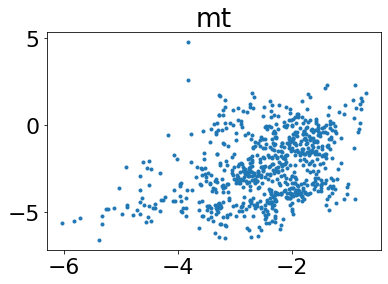

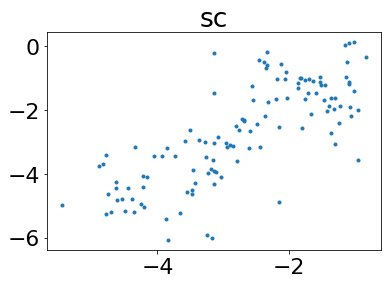

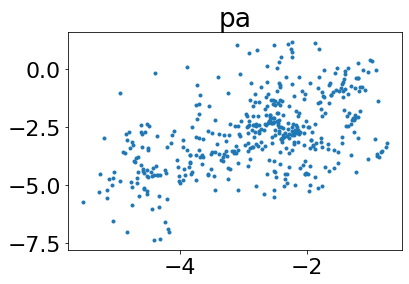

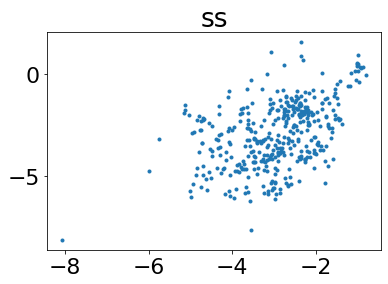

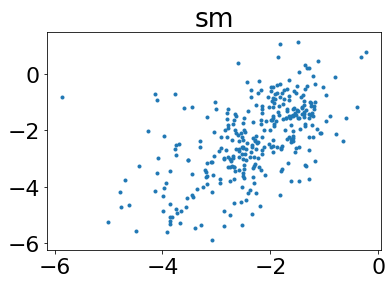

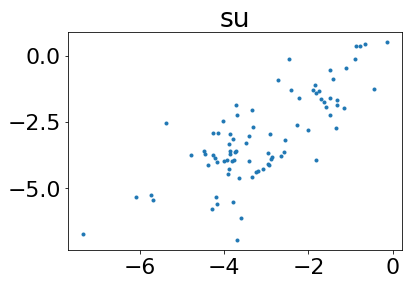

In [44]:
from sklearn import linear_model as lm
import sklearn
n = 0
r2s = [None] * len(a['meantempclass'].unique())
mntemp = np.zeros(len(r2s))
abox = pd.DataFrame()
abox['index'] = np.arange(len(eros1[1])*len(a['meantempclass'].unique()))
abox['r2s'] = 0
abox['drat'] = 0
abox['n'] = 0
abox['m/n'] = 0
abox['class'] = 0
abox['drat'] = 0
abox['dratave'] = 0
abox['pcoef_d'] = 0
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

mt = a['meantempclass'].unique()

c=0

for li in range(len(a['meantempclass'].unique())):
    ids = a.index[a['meantempclass'] == a['meantempclass'].unique()[li]]
    
    r2s[li] = np.zeros(len(eros1[1]))
    pcoef_d = np.zeros(len(eros1[1]))
    resid = np.zeros(len(eros1[1]))
    pcoef = np.zeros(len(eros1[1]))
    ks2 = ns.copy()#ks.copy()
    diffus2 = diffus.copy()
    try:
        mntemp[li] = np.mean(a['bio12'][ids])
    except:
        'meh'

    for i in [1]:#range(len(eros1[1])):#range(len(ms)):
            if dfs[i][ids] is None:
                continue
                        
            precip = a['bio12']
            #print(len(ids))
            y = np.log(np.float64(a['ebe_mmkyr'][ids]) / 1000 )
            x = np.log(dfs[i][ids]*precip[ids].to_numpy()**1 / 1000 ) ### need to change this mabe if not looking at lith
            
            #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
            #x=x[I_min]
            #y=y[I_min]

            xi = x.copy()
            I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
            x=np.delete(x,I)
            y=np.delete(y,I)
            I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
            x = np.delete(x,I2)
            y = np.delete(y,I2)
            
            
            l1  = lm.LinearRegression(fit_intercept=False)
            l = lm.LinearRegression(fit_intercept=False)
            if len(x[np.logical_not(np.isnan(x))])>50:
                
                    #print(a.loc[ids[0],'meantempclass'])
                    p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                    p = l.fit(x.reshape(-1,1), y.reshape(-1,1))
                    intercept =np.mean( y - x )
                    y2 = x + intercept
                  #  ####
                   # if 1:
                       # x = x[ y2 > -4 ]

                       # y = y[ y2 > -4 ]
                       # y2 = y2[y2>-4]
                    ####
                    #
                    y3 = np.exp(x) * np.exp(intercept)#p1.predict(np.exp(x.reshape(-1,1)))
                    r2s[li][i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                    #
                    diffus2[i] *= p1.coef_
                    #
                    resid[i] = np.mean(np.abs(np.exp(y.ravel())-y3.ravel()))
                    #
                    pcoef[i] = p.coef_
                    
                    print('l='+str(len(x[x>0])))

                    r2 = (y2 - y) ** 2
                    plt.figure()
                    
                    plt.plot(y2,y,'.')
                   # plt.xscale('log')
                   # plt.yscale('log')
                    plt.title(a['meantempclass'].unique()[li])
                    
                    pcoef_d[i] = np.exp(intercept) * 1e-8 *1# sum(r2)/(len(r2) - 1)
                    
                    abox.loc[c,'r2s'] = r2s[li][i]
                    
                    abox.loc[c,'meantempclass'] = a['meantempclass'].unique()[li]#li#  - you can change this if numerical etc.
                    #abox.loc[c,'meantempclass'] = li
                    abox.loc[c,'class'] = mt[li]
                    
                    abox.loc[c,'n'] = ns[i]
                    
                    abox.loc[c,'Diffusion/total'] = dratave[i] 
                    
                    abox.loc[c,'m/n'] = ms[i] / ns[i]
                    
                    abox.loc[c,'k'] = pcoef_d[i] #/ mntemp[li]
                    
                    abox.loc[c,'D/k'] = diffus[i]/1e-8 * pcoef_d[i] # Now by multiplying, it is just D
                    
                    c=c+1


In [26]:
# g30['model'] = 'n=2, D/k=5.0 10⁶'
# g40['model'] = 'n=1.0, D/k=0'
# g_2 = g40.append(g30)

0 nan
mt 0.0
pa 0.0
sc 0.0
sm 0.0
ss 0.0
su 0.0


AttributeError: 'int' object has no attribute 'left'

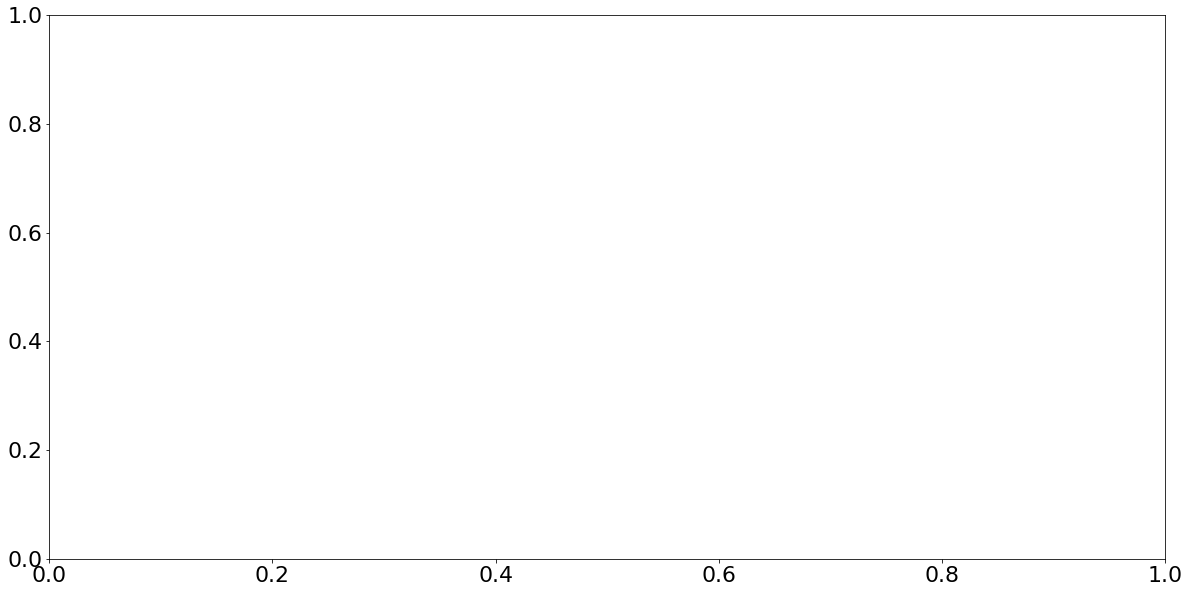

In [45]:
## precip
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'k'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'class'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])
    g2 = g2.append(g)
    print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['class']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'], 2)
g3['k'] = (g3['k'])
g3['log(D/k)'] = np.log10(g3['D/k'])
#ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g2['k'] = g2['k']

g3['n'] = g3['n']

#g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 1:#'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int(g3.loc[i,property1].left+1)) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'

sns.scatterplot(data=g30, x=property1, y=valy,palette=cs)
ax2 = plt.twinx()
sns.scatterplot(data=g40, x=property1, y=valy,palette=cs)

#plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels('')
#plt.ylim([-10,-5])
#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])

0 nan
mt 0.0
pa 0.0
sc 0.0
sm 0.0
ss 0.0
su 0.0


AttributeError: 'int' object has no attribute 'left'

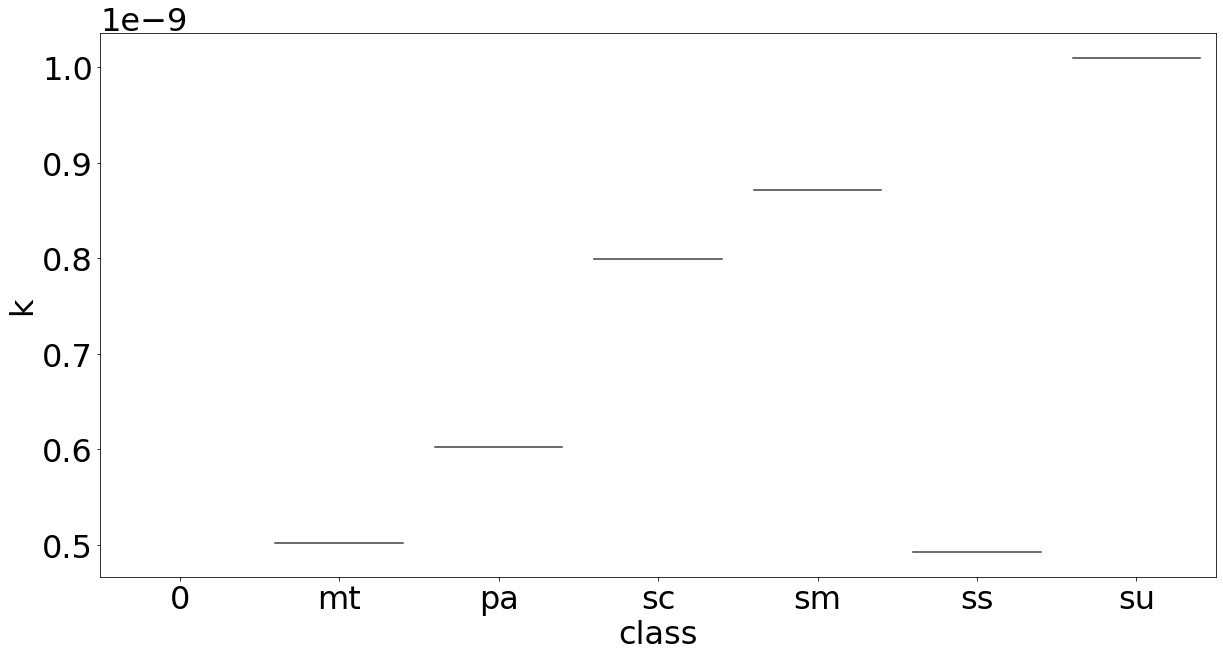

In [46]:
## precip
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'k'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'class'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])
    g2 = g2.append(g)
    print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['class']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'], 2)
g3['k'] = (g3['k'])
g3['log(D/k)'] = np.log10(g3['D/k'])
#print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g2['k'] = g2['k']

g3['n'] = g3['n']

#g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 1:#'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int(g3.loc[i,property1].left+1)) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'

sns.violinplot(data=g3,x=property1, y=valy,palette=cs)
#plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels('')
#plt.ylim([-10,-5])
#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])


TypeError: 'LinearRegression' object is not subscriptable

0 0.0
1 0.0
2 0.0
3 0.0


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/2697442339.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3[property1] = g3['class']
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/2697442339.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3['r'+'2'.translate(superscript)] = g3['r2s']
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_13063/2697442339.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')]

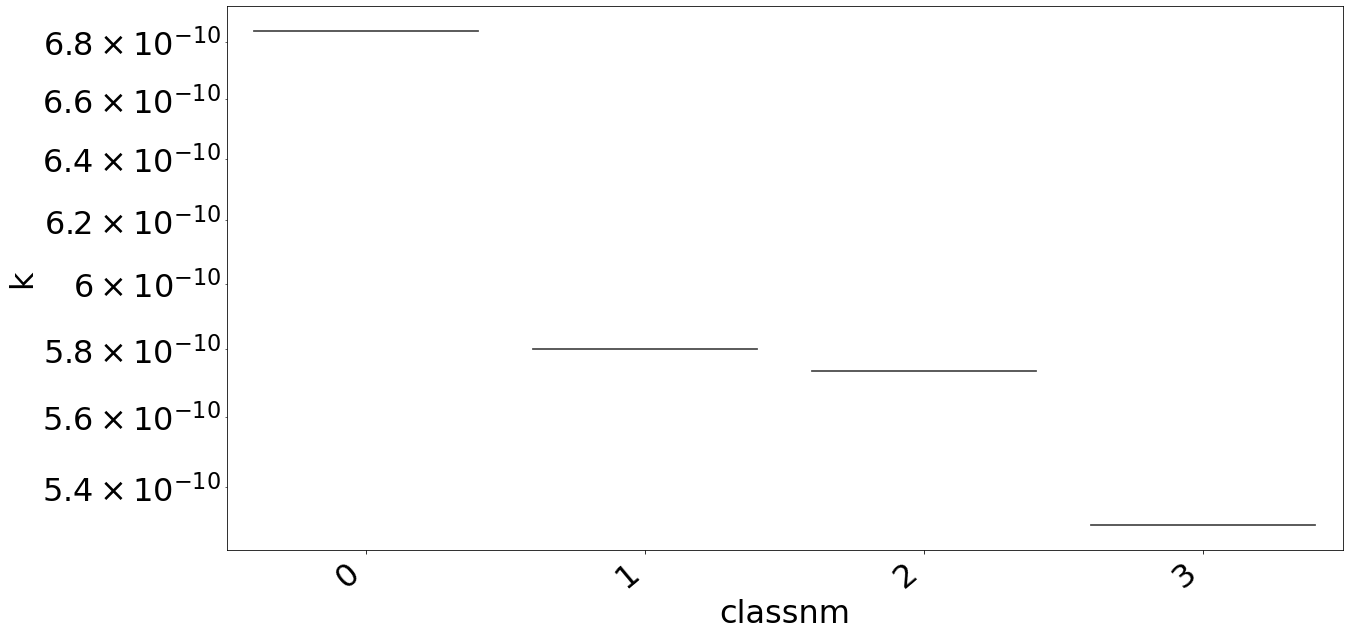

In [39]:
## lithology
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'k'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
abox['classnm'] = abox['meantempclass']
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'classnm'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.9999,1])
    g2 = g2.append(g)
    print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['class']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['k'] = (g3['k'])
g3['log(D/k)'] = (g3['D/k'])
#print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g3['k'] = (g3['k'])
#g2['k'] = np.log10(g2['k'])

g3['n'] = g3['n']

g3[property1] = g3['class']
g3.index = range(len(g3))
#plt.ylim((.000005,.00002))
sns.violinplot(data=g3,x=property1, y=valy,palette=cs)
plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels('')
#plt.ylim([-10,-5])
#plt.ylim([10,6])
#plt.plot([.1,.1],[.2,.2])

In [298]:
np.max(r2s)

0.7095215913379803

ValueError: x and y must have same first dimension, but have shapes (3997,) and (1000,)

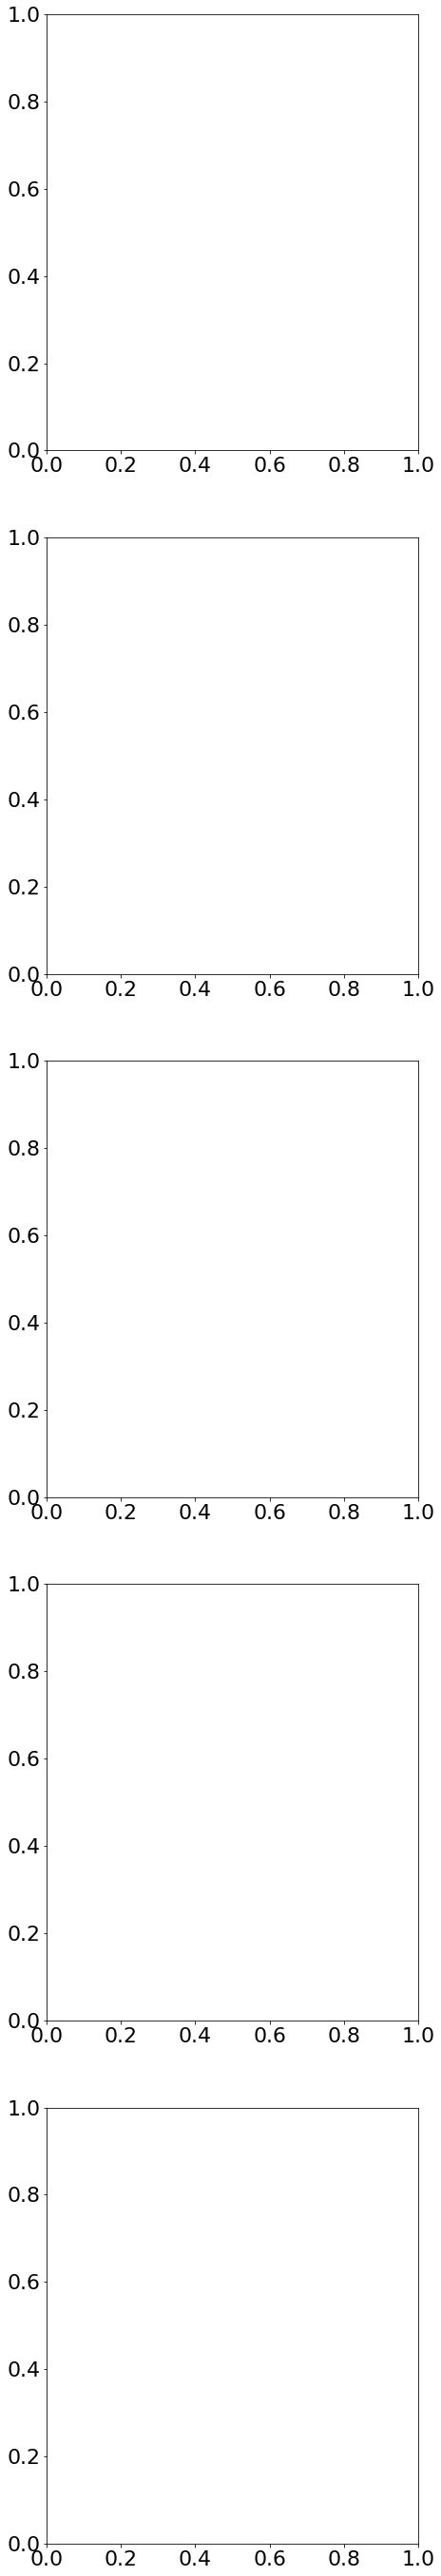

In [40]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(5,1,figsize=(7,7*7))

mt = a['meantempclass'].unique()
try:
    codes = mt.codes
except:
    codes = range(len(mt))#range(max(a['meantempclass']))

lo = np.zeros(len(codes))
r2max = np.zeros(len(codes))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
abox.index = abox['class']
varnm = 'n'
c = 0;
for i in range(len(codes)):
    if mt[codes[i]] is None:
        continue
    
    var = g2.loc[g2['class'] == mt[codes[i]]][varnm].to_numpy()
    #var.index = np.range(len(var))
    plt.sca(ax[c])
    try:
        lox[i] = mt[i].left

    except:
        try:
            lox[i] = codes[i]#codes[i][0].left#lens[i]
        except:
            continue
    plt.plot(var,r2s[i], '.k')
    #plt.ylim([.2, .7])
    lo[i] = var[np.argmax(r2s[i])]
    r2max[i] = np.max(r2s[i])
    plt.xlabel('D/k')
    #plt.xscale('log')
    try:
        #lith
        #plt.title(g2.loc[g2['class'] == mt[codes[i]]]['classnm'].iloc[0])
        #precip
        #plt.title('Precip = ' +str(mt[codes[i]]))
        #x - validation
        plt.title('Trial# ' +str(mt[codes[i]+1]))

    except:
        continue
    #plt.xlabel('E' + 'diffusion'.translate(subscript) + '/' 'E' + 'total'.translate(subscript))
    plt.xlabel(varnm)
    plt.ylabel('r'+'2'.translate(superscript))
    #plt.xlabel(t.loc[codes[i],'region'])
    c+=1
fig,ax = plt.subplots(figsize=(7,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.scatter(lox[r2max>-.3],lo[r2max>-.3],c=mntemp[r2max>-.3], s=50)
#plt.scatter(lo[r2max>.3],r2max[r2max>.3],c='k',s=50)

#plt.yscale('log')
plt.xlabel ('Trial#')
plt.ylabel (varnm)
#plt.ylabel('r' + '2'.translate(superscript))
#plt.ylim((0,4))
#plt.xscale('log')

In [ ]:
plt.plot(a['maxr2'][a['meantempclass']==13],a['ebe_mmkyr'][a['meantempclass'] == 13]/1000,'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
a1 = a[a['meantempclass'] == 1]
fig,ax = plt.subplots(figsize=(10,10))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(ax=ax,alpha=.5)
a1.geometry = a1.centroid
a1.plot(color='r',ax=ax)
len(a1)


NameError: name 'slps1' is not defined

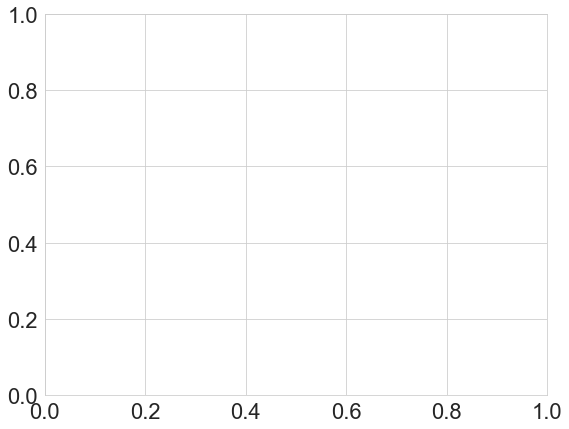

In [222]:
plt.subplots(figsize=(9,7))
plt.plot(slps1[:len(a)], a['ebe_mmkyr']/1000,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 average slope')
plt.ylabel('Basin avg. Erosion rate (mm/yr)')
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(slps1[:len(a)])
#I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#x=x[I_min]
#y=y[I_min]
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isinf(y)))[0]
x=np.delete(x,I2)
y=np.delete(y,I2)



l1  = lm.LinearRegression(fit_intercept=False)
l1 = l1.fit(x.reshape(-1,1),y.reshape(-1,1))
x2 = np.log(np.linspace(10**-2,10**0,100).reshape(-1,1))
y2 = l1.predict(x2)
plt.plot(np.exp(x2),np.exp(y2),'k',linewidth=3)
y3 = l1.predict((x.reshape(-1,1)))
r2 = sklearn.metrics.r2_score(y.reshape(-1,1),y3.reshape(-1,1))
plt.text(10**-2.2,10**-2.82,'r' +'2'.translate(superscript) + ' = {} '.format(str(np.round(r2,2))),rotation=27)
plt.text(10**-2.2,10**-2.3,'slope'+ ' = {} '.format(str(np.round(l1.coef_[0][0],1))),rotation=27)


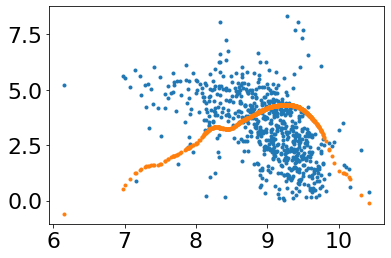

In [149]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
diff = np.abs(y3.reshape(-1,1)-y.reshape(-1,1))
lens = np.array(list(range(len(diff))))
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(x.reshape([-1,1]),diff.reshape([-1,1]))
s = kde.score_samples(x.reshape(-1,1))
plt.plot(x,diff,'.')
plt.plot(x,s+4.5,'.')


In [150]:
a['meantempclass'] = 0
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
a['meantempclass'][a.index[a.geometry.centroid.x<-90]] = 3# West coast
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.x>100,a.geometry.centroid.y<0)]] = 4

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/2246413936.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/2246413936.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/2246413936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/1975516294.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  b.geometry = b.geometry.centroid


KeyError: 'meantempclass'

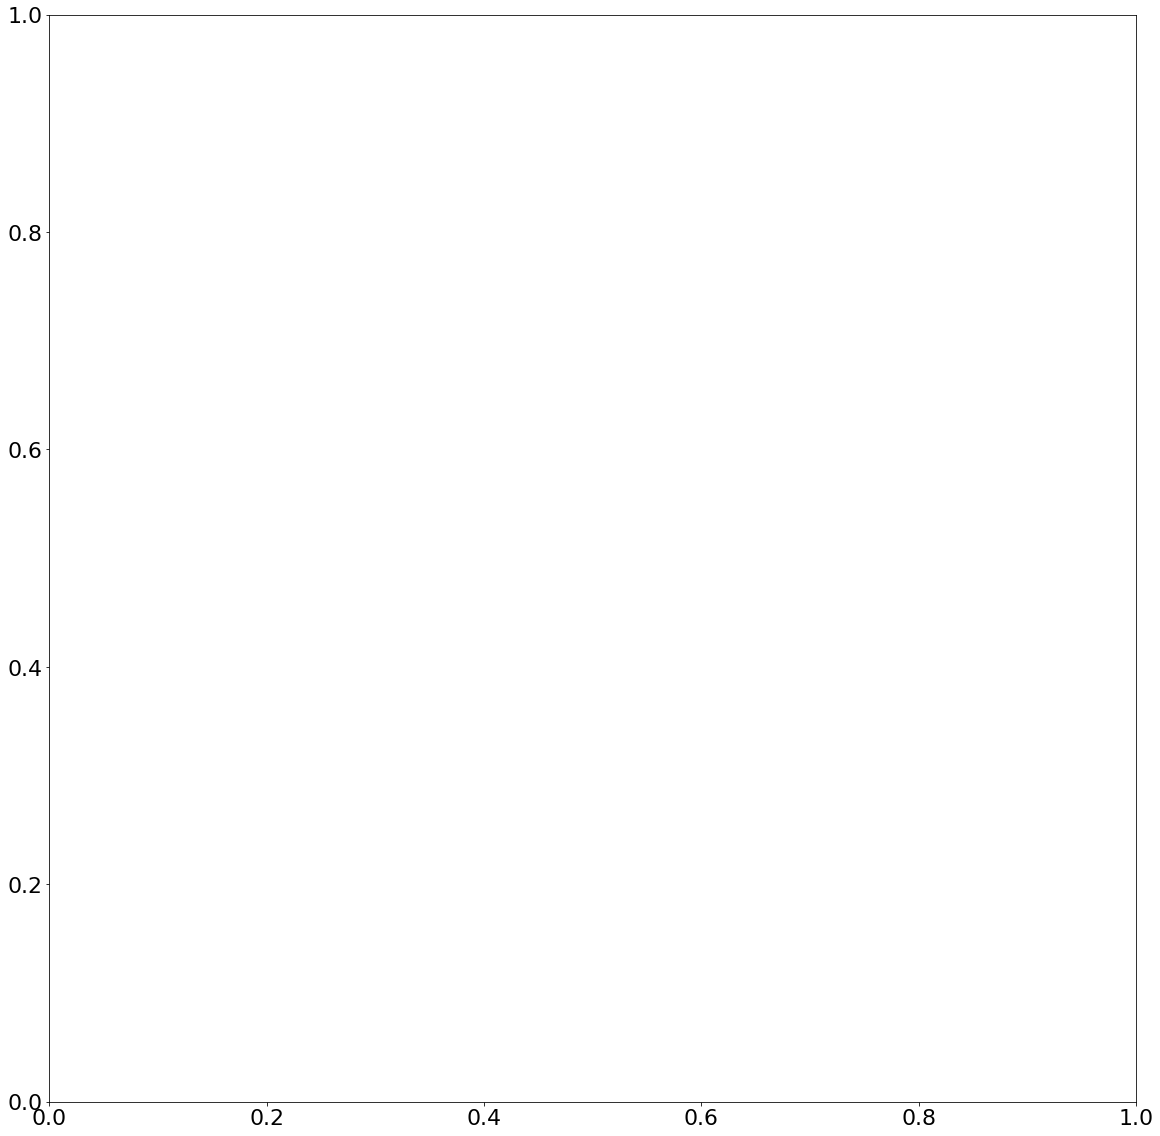

In [765]:
#a['binval'] = [a['meantempclass'][i].left for i in range(len(a))]

fig,ax = plt.subplots(figsize=(20,20))
b = a.copy()
b.geometry = b.geometry.centroid
b.plot(column='meantempclass',ax=ax,vmin=-1,vmax=20,cmap='jet', s = 1)

In [1103]:
l1 =[]
for i in range(len(dfs)):
    l1.append(len(dfs[i][dfs[i]>.00001]))
l1 = np.array(l1)

2.9270160438535517e-08

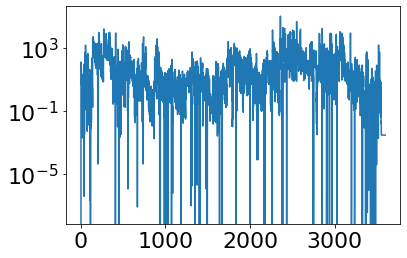

In [1104]:
plt.plot(dfs[100])
plt.yscale('log')
np.min(dfs[100][dfs[100]>0])

## I copied over parts of the diffusion notebook here

In [223]:
folder = 'results/dn_only///'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)



In [224]:
eros1=eros1[a.index]

In [225]:
for i in range(len(eros1)):
    if not((eros1[i] is None)):
        eros1[i] = np.array(eros1[i])
        eros1[i][0] = eros1[i][9]# Need too change this depending ...
        

In [226]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
dfs_d = dfs.copy()

In [227]:
folder = 'results/r_mn05_6/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [228]:
## 19 is loc for ds = 2, only for this specific case

eros1 = eros1[a.index]


In [229]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
drat = np.array([None]*len(eros1[1]))
            
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        drat[i] = np.zeros(len(eros1))

        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i] #- dfs_d[0][k]* diffus[i]/.01
                #dfs[i][k] = dfs[i][k] + dfs_d[0][k]*200
                drat[i][k] = (dfs_d[0][k] * diffus[i] ) / eros1[k][i] 
            c+=1
    #return dfs


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/1747009988.py:19: RuntimeWarning: invalid value encountered in double_scalars
  drat[i][k] = (dfs_d[0][k] * diffus[i] ) / eros1[k][i]


In [230]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
badn = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression(fit_intercept=False)
        if len(x[np.logical_not(np.isnan(x))])>n-3000:
                #print(len(x[np.logical_not(np.isnan(x))]))
                
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept =np.mean(y-x)
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                try:
                    r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)

                except:
                    print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = -np.sum(np.power(y.ravel()-np.log(y3.ravel()),2))
                #print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p1.intercept_
                dratave[i] = np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )])
               # if resid[i]>127.9:
                #    break
        else:
            print(i)
            badn.append(diffus[i])
            


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcb

(0.0, 0.5)

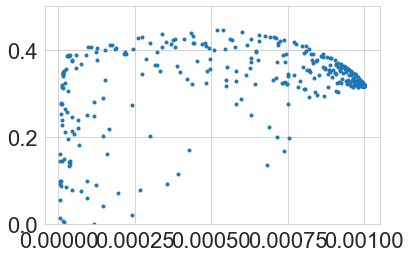

In [231]:
plt.plot(dratave,r2s,'.')
plt.ylim([0, .5])

In [851]:
for i in range(len(drat)):
    drat[i] = drat[19]

In [239]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})

superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
mt = a['meantempclass'].unique()
codes = mt.codes
lo = np.zeros(len(codes))
var = dratave


lox = np.zeros(len(codes))
for i in range(len(codes)):
    lox[codes[i]] = mt[codes[i]].left
    fig,ax = plt.subplots(figsize=(10,7))
    plt.plot(var,r2s[codes[i]], '.k')
    plt.ylim([.2, .65])
    lo[codes[i]] = var[np.argmax(r2s[codes[i]])]
    plt.xlabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
    #plt.xscale('log')
    plt.title('Range = ' + str(mt[codes[i]]))

fig,ax = plt.subplots(figsize=(10,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.plot(lox,lo,'k.-',linewidth=2,markersize=30)
plt.ylabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.yscale('log')


KeyError: 'meantempclass'

## Geologic 

In [199]:
from rasterstats import zonal_stats as zn
import rasterio as rio

In [282]:
geo = zn(a,'/Volumes/Samsung_T5/geo4.tif',stats=['majority','min','max','mean'])
major = [geo[i]['majority'] for i in range(len(geo))]
means = [geo[i]['mean'] for i in range(len(geo))]
mins = [geo[i]['min'] for i in range(len(geo))]

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [283]:
np.save('geo_major.npy', major)

In [284]:
a['meantempclass'] = major
#a['meantempclass'] 

3553

In [203]:
sns.color_palette("tab10").as_hex()[0]

'#1f77b4'

<ipython-input-1180-84c3268153e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 146] = 1
<ipython-input-1180-84c3268153e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 96] = 0
<ipython-input-1180-84c3268153e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 167] = 2
<ipython-input-1180-84c3268153e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

<AxesSubplot:>

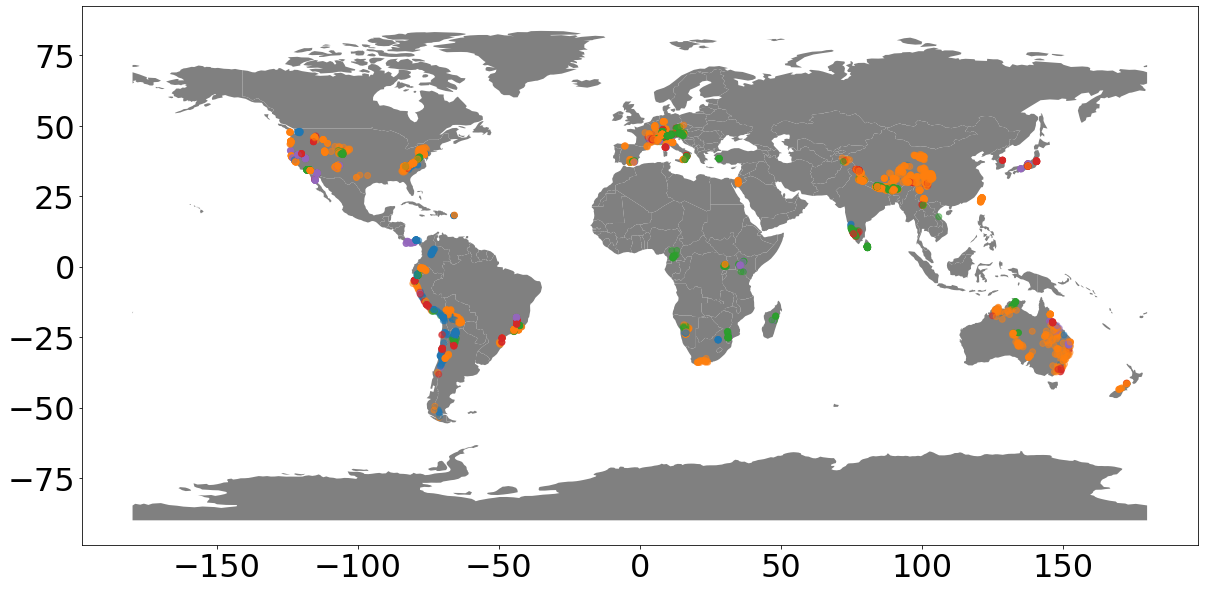

In [1180]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = major

a['geo'][a['geo'] == 146] = 1
a['geo'][a['geo'] == 96] = 0 
a['geo'][a['geo'] == 167] = 2
a['geo'][a['geo'] == 252] = 3
a['geo'][a['geo'] == 255] = 4

a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("tab10").as_hex()[:5]),vmin=0, vmax=5,alpha=.5)
#plt.imshow(f)

In [211]:
len(np.logical_and(a['geo']>0 and a['geo'] < 5))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1598]:
f = rio.open('
             /geology.tif')
r = f.read()
r2 = r.copy()

In [1599]:


geovals = [146,167,252,255,96,253,176,187]



In [1600]:
ageo = gpd.GeoDataFrame(geometry=a['geometry'])

In [1688]:
ageo['geo'] = a['geo']

In [1689]:
ageo.to_file('geo_test')

In [ ]:
test['Short-term erosion rate (mm kyr^-1)']

In [699]:
test = pd.read_csv('/Users/gr_1/Downloads/Chen_et_al_2021_short-term_erosion_rate_data.csv')

In [705]:
test['log(short-term erosion rate (mm kyr-1))'] = np.log10(test['Short-term erosion rate (mm kyr^-1)'])

In [ ]:
test['log(short-term erosion rate (mm kyr-1))']

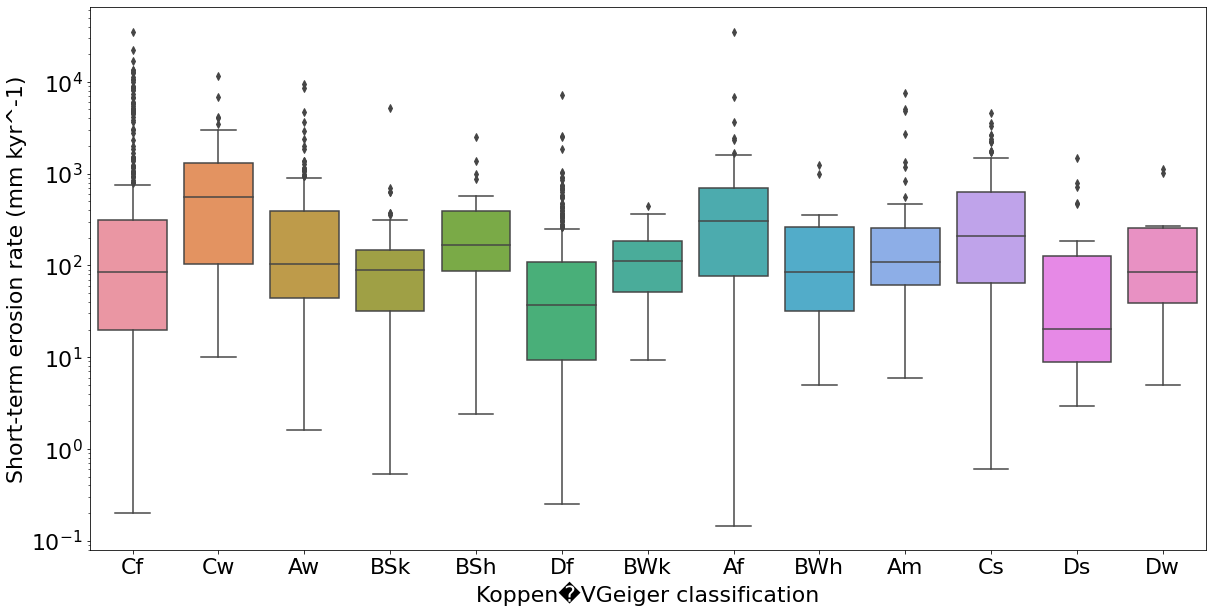

In [706]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=test,x='Koppen�VGeiger classification',y='Short-term erosion rate (mm kyr^-1)')
plt.yscale('log')

AttributeError: module 'seaborn' has no attribute 'qqplot'

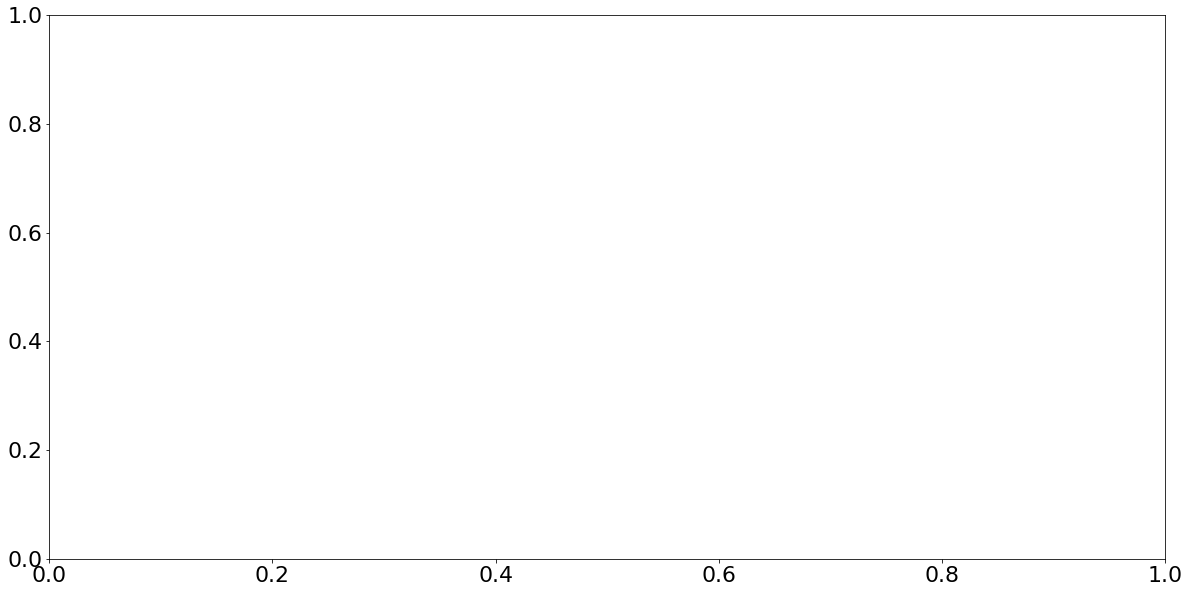

In [774]:
plt.subplots(figsize=(20,10))

sns.qq(data=test,x='Koppen�VGeiger classification',y='log(short-term erosion rate (mm kyr-1))')


In [783]:
from statsmodels.graphics.gofplots import qqplot_2samples

<AxesSubplot:xlabel='log(short-term erosion rate (mm kyr-1))', ylabel='Count'>

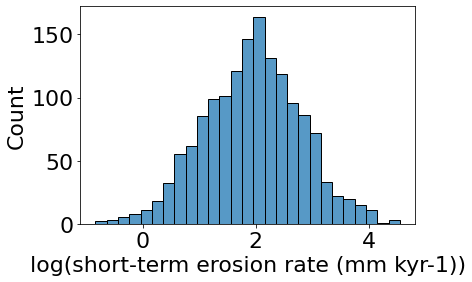

In [708]:
sns.histplot(data=test,x='log(short-term erosion rate (mm kyr-1))')

In [801]:
from scipy.stats import kruskal as ks

In [818]:
g1 = []
g2 = []
for i,g in test.groupby('Koppen�VGeiger classification'):
    g1.append(g['Short-term erosion rate (mm kyr^-1)'])
    g2.append(g['log(short-term erosion rate (mm kyr-1))'])

In [819]:
p = np.zeros((len(g1),len(g1)))
for i in range(len(g1)):
    for j in range(i,len(g1)):
        p[i,j] = ks(g1[j],g1[i]).pvalue

In [815]:
g1 = []
for i in range(10):
    subset = test.sample(10)
    g1.append(subset['Short-term erosion rate (mm kyr^-1)'])

([<matplotlib.axis.YTick at 0x1b5a0e580>,
 [Text(0, 0, 'Cf'),
  Text(0, 1, 'Cw'),
  Text(0, 2, 'Aw'),
  Text(0, 3, 'BSk'),
  Text(0, 4, 'BSh'),
  Text(0, 5, 'Df'),
  Text(0, 6, 'BWk'),
  Text(0, 7, 'Af'),
  Text(0, 8, 'BWh'),
  Text(0, 9, 'Am'),
  Text(0, 10, 'Cs'),
  Text(0, 11, 'Ds'),
  Text(0, 12, 'Dw')])

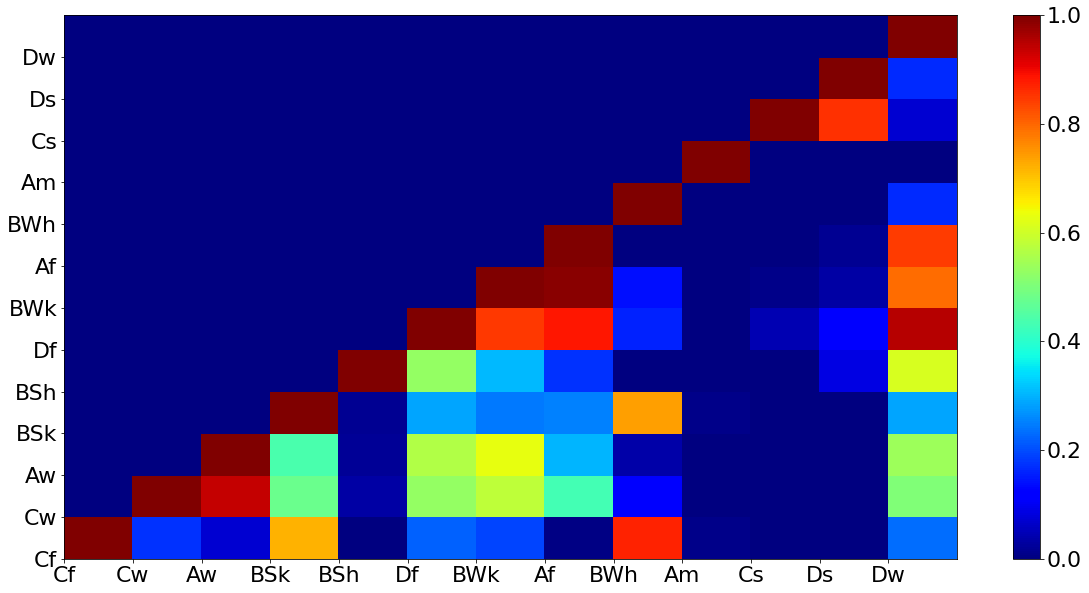

In [773]:
plt.subplots(figsize=(20,10))
plt.pcolor(p,vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.xticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())
plt.yticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())